<a href="https://colab.research.google.com/github/hyeonseonn/sensing_app/blob/main/%5B0811new%5Dmachine_learning_for_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## memory ÏòàÏ∏° (Ï†êÏßÑÏ†Å Ìå®ÌÑ¥, ÎäêÎ¶∞ Ï£ºÍ∏∞)

## Î≥µÏû°Ìïú memory ÏÇ¨Ïö©Îüâ ÌòïÌÉú

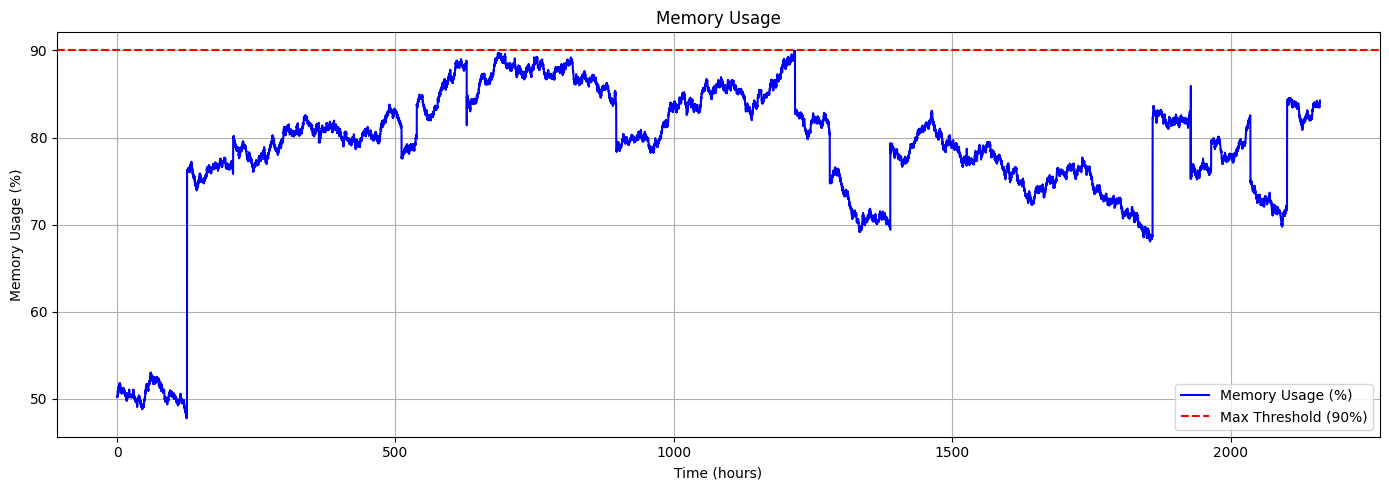

In [2]:
import numpy as np
import matplotlib.pyplot as plt

days = 90
interval_minutes = 5
steps_per_day = int(24 * 60 / interval_minutes)
total_steps = days * steps_per_day
time_hours = np.arange(total_steps) * (interval_minutes / 60)

baseline = 50 + np.random.normal(0, 0.5)  # baseline ÏûêÏ≤¥Ïóê ÎÖ∏Ïù¥Ï¶à
threshold = 90
small_noise_std = 0.1
gc_release_range = (5, 15)

# spike ÏÑ§Ï†ï
event_spikes = np.zeros(total_steps)
for _ in range(10):
    idx = np.random.randint(0, total_steps - 10)
    duration = np.random.randint(1, 5)
    spike_val = np.random.uniform(10, 60)
    event_spikes[idx:idx+duration] += spike_val

for _ in range(5):
    idx = np.random.randint(0, total_steps - 2)
    spike_val = np.random.uniform(40, 55)
    event_spikes[idx] += spike_val

memory_usage = []
current_mem = baseline

for i in range(total_steps):
    # i Í∞íÏóê Îî∞Îùº growth_per_step Ï°∞Ï†ï
    if i < total_steps * 0.3:
        growth_per_step = 0.001
    elif i < total_steps * 0.6:
        growth_per_step = 0.002
    else:
        growth_per_step = 0.0005

    current_mem += growth_per_step + np.random.normal(0, small_noise_std) + event_spikes[i]

    # max threshold Ï¥àÍ≥ºÌïòÏßÄ ÏïäÎèÑÎ°ù Ï†úÌïú
    if current_mem > threshold:
        current_mem = threshold

    # GC ÏûëÎèô
    if current_mem >= threshold:
        release_amount = np.random.uniform(*gc_release_range)
        current_mem -= release_amount
        current_mem = max(current_mem, baseline)

    memory_usage.append(current_mem)

memory_usage = np.array(memory_usage)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 5))
plt.plot(time_hours, memory_usage, label="Memory Usage (%)", color='blue')
plt.axhline(threshold, color='red', linestyle='--', label="Max Threshold (90%)")
plt.title("Memory Usage")
plt.xlabel("Time (hours)")
plt.ylabel("Memory Usage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. ÎÖ∏Ïù¥Ï¶à ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞

ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ   : 48.54%
ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ : 44.44%


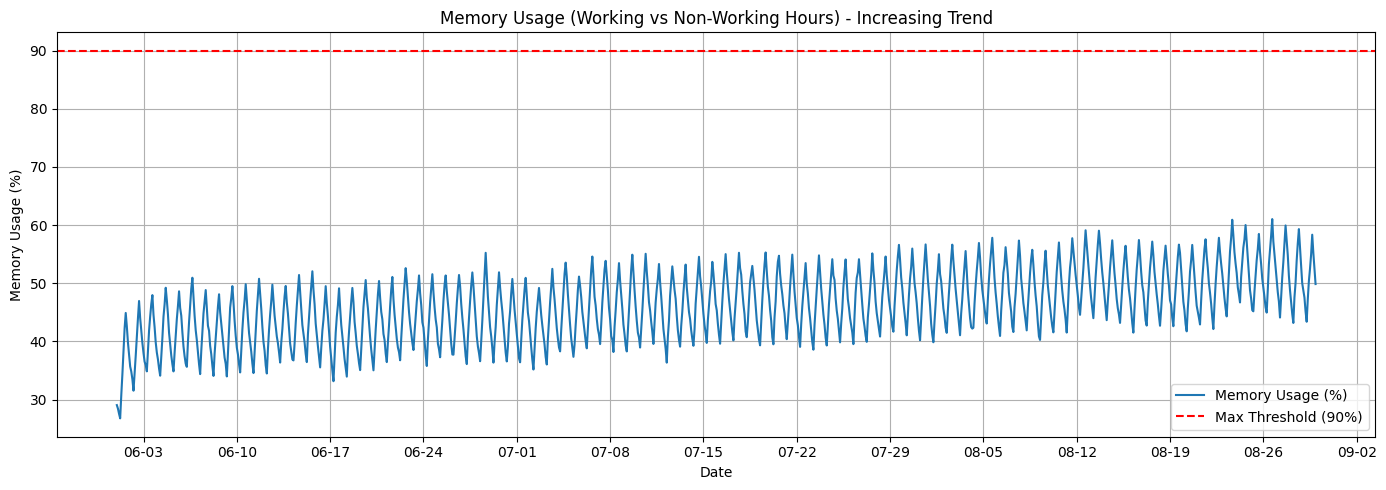

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 68ms/step - loss: 0.1663 - val_loss: 0.0226
Epoch 2/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0225 - val_loss: 0.0209
Epoch 3/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0217 - val_loss: 0.0200
Epoch 4/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0202 - val_loss: 0.0156
Epoch 5/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0167 - val_loss: 0.0139
Epoch 6/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 7/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 8/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0050 - val_loss: 0.0034
Epoch 9

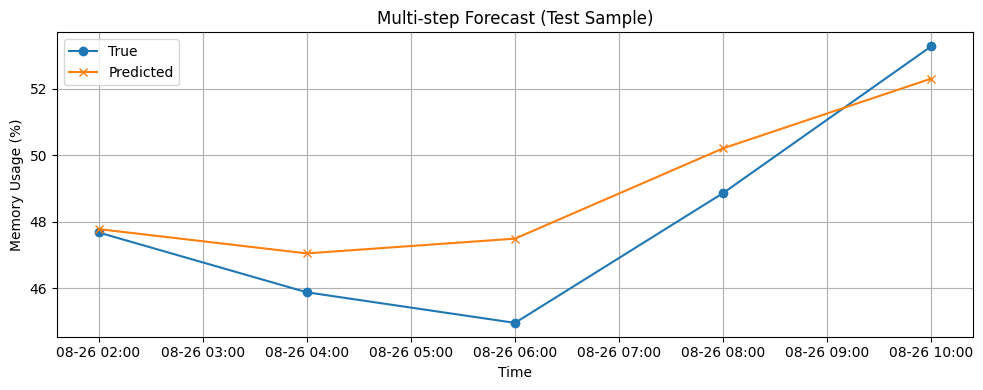

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

# =========================================================
# 0) ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ§Ï†ï
# =========================================================
np.random.seed(42)

days = 90
interval_minutes = 120  # Îç∞Ïù¥ÌÑ∞ Í∞ÑÍ≤©(Î∂Ñ) ‚Äî Ïó¨Í∏∞Îßå Î∞îÍæ∏Î©¥ Ï†ÑÏ≤¥Í∞Ä ÏûêÎèô ÏùºÍ¥Ä
steps_per_day = int(24 * 60 / interval_minutes)
total_steps = days * steps_per_day

start_date = "2025-06-01"
time_index = pd.date_range(start=start_date, periods=total_steps, freq=f"{interval_minutes}min")

threshold = 90
small_noise_std = 0.5
gc_release_range = (5, 15)

# =========================================================
# 1) Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ ÏãúÎÆ¨Î†àÏù¥ÏÖò
# =========================================================
event_spikes = np.zeros(total_steps)

# ÎûúÎç§ Ïä§ÌååÏù¥ÌÅ¨ (Ïù¥Î≤§Ìä∏ÏÑ±)
for _ in range(10):
    idx = np.random.randint(0, total_steps - 10)
    duration = np.random.randint(1, 5)
    spike_val = np.random.uniform(10, 60)
    event_spikes[idx:idx+duration] += spike_val

# Îã®Ïùº ÏàúÍ∞Ñ Ïä§ÌååÏù¥ÌÅ¨
for _ in range(5):
    idx = np.random.randint(0, total_steps - 2)
    spike_val = np.random.uniform(40, 55)
    event_spikes[idx] += spike_val

memory_usage = []
current_mem = 30.0  # Ï¥àÍ∏∞Í∞í

for i in range(total_steps):
    hour_of_day = time_index[i].hour

    # ÏóÖÎ¨¥ÏãúÍ∞Ñ: Ï¶ùÍ∞Ä / ÎπÑÏóÖÎ¨¥: Í∞êÏÜå Í≤ΩÌñ•
    if 8 <= hour_of_day < 18:
        growth_per_step = 0.015
        target_level = 70
    else:
        growth_per_step = -0.002
        target_level = 20

    # Ïû•Í∏∞ Ï¶ùÍ∞Ä Ï∂îÏÑ∏(ÏµúÎåÄ +10%)
    trend = i / total_steps * 10.0

    # ÎÖ∏Ïù¥Ï¶à + Ïä§ÌååÏù¥ÌÅ¨ Î∞òÏòÅ
    current_mem += growth_per_step + np.random.normal(0, small_noise_std) + event_spikes[i] * 0.02
    # ÌÉÄÍ≤ü Î†àÎ≤®Î°úÏùò ÏôÑÎßåÌïú ÏàòÎ†¥(ÏßÄÏàòÌèâÌôú ÎäêÎÇå)
    current_mem = current_mem * 0.9 + (target_level + trend) * 0.1

    # ÏÉÅÌïúÏÑ†
    if current_mem > threshold:
        current_mem = threshold

    # GC Î∞úÏÉù Ïãú Î©îÎ™®Î¶¨ Ìï¥Ï†ú
    if current_mem >= threshold:
        release_amount = np.random.uniform(*gc_release_range)
        current_mem -= release_amount
        current_mem = max(current_mem, target_level)

    memory_usage.append(current_mem)

memory_usage = np.array(memory_usage, dtype=float)

# Í∏∏Ïù¥ Í≤ÄÏ¶ù(Ï§ëÏöî!)
assert len(time_index) == len(memory_usage), "time_indexÏôÄ memory_usage Í∏∏Ïù¥Í∞Ä Îã§Î¶ÖÎãàÎã§."

# =========================================================
# 2) DataFrame Íµ¨ÏÑ± Î∞è ÏöîÏïΩ ÌÜµÍ≥Ñ
# =========================================================
df = pd.DataFrame({"timestamp": time_index, "memory_usage": memory_usage}).set_index("timestamp")

# ÏóÖÎ¨¥/ÎπÑÏóÖÎ¨¥ ÌèâÍ∑†
working_hour_mask = (df.index.hour >= 8) & (df.index.hour < 18)
working_hour_avg = df.loc[working_hour_mask, "memory_usage"].mean()
non_working_hour_avg = df.loc[~working_hour_mask, "memory_usage"].mean()

print(f"ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ   : {working_hour_avg:.2f}%")
print(f"ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ : {non_working_hour_avg:.2f}%")

# =========================================================
# 3) ÏãúÍ∞ÅÌôî(Ïõê Îç∞Ïù¥ÌÑ∞)
# =========================================================
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["memory_usage"], label="Memory Usage (%)")
plt.axhline(threshold, color="red", linestyle="--", label="Max Threshold (90%)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.title("Memory Usage (Working vs Non-Working Hours) - Increasing Trend")
plt.xlabel("Date")
plt.ylabel("Memory Usage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# 4) Ïä§ÏºÄÏùºÎßÅ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# =========================================================
scaler = MinMaxScaler()
mem_scaled = scaler.fit_transform(df[["memory_usage"]].values)  # (N, 1)
mem_scaled = pd.DataFrame(mem_scaled, index=df.index, columns=["memory_usage"])

past_steps = 20
future_steps = 5

n_total = len(mem_scaled)
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)

mem_train = mem_scaled.iloc[:n_train]
mem_val   = mem_scaled.iloc[n_train:n_train+n_val]
mem_test  = mem_scaled.iloc[n_train+n_val:]

# =========================================================
# 5) ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
#    - Í∞Å subset(Train/Val/Test)ÏóêÏÑú ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÏãúÌÄÄÏä§Î•º ÏÉùÏÑ±
# =========================================================
def create_sequences(df_1col, past_steps=20, future_steps=5):
    """
    df_1col: 1Ïó¥ DataFrame (indexÎäî datetime)
    Returns:
      X: (samples, past_steps, 1)
      y: (samples, future_steps)
    """
    data = df_1col.values  # (N, 1)
    X, y = [], []
    for i in range(len(data) - past_steps - future_steps):
        X.append(data[i:i+past_steps])                         # (past_steps, 1)
        y.append(data[i+past_steps:i+past_steps+future_steps]) # (future_steps, 1)
    X = np.array(X)
    y = np.array(y).squeeze(-1)
    return X, y

X_train, y_train = create_sequences(mem_train, past_steps, future_steps)
X_val,   y_val   = create_sequences(mem_val,   past_steps, future_steps)
X_test,  y_test  = create_sequences(mem_test,  past_steps, future_steps)

# Î∞©Ïñ¥ÏΩîÎìú: ÏãúÌÄÄÏä§Í∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏùÑ Ï†ïÎèÑÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßßÏùÄÏßÄ ÌôïÏù∏
assert len(X_train) and len(X_val) and len(X_test), "ÏãúÌÄÄÏä§Í∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. past_steps/future_stepsÎ•º Ï§ÑÏó¨Î≥¥ÏÑ∏Ïöî."

# =========================================================
# 6) Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ (Conv1D + LSTM)
# =========================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu'),
    Dense(future_steps)  # Îã§Îã®Í≥Ñ(5Ïä§ÌÖù) ÏòàÏ∏°
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)

# =========================================================
# 7) ÏòàÏ∏°/Ïó≠Ïä§ÏºÄÏùº Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
# =========================================================
pred = model.predict(X_test)  # (samples, future_steps)
true = y_test                 # (samples, future_steps)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ: ÌèâÌÉÑÌôî ‚Üí inverse_transform ‚Üí ÏõêÌòï Î≥µÏõê
pred_inv = scaler.inverse_transform(pred.reshape(-1, 1)).reshape(-1, future_steps)
true_inv = scaler.inverse_transform(true.reshape(-1, 1)).reshape(-1, future_steps)

mae  = mean_absolute_error(true_inv.ravel(), pred_inv.ravel())
rmse = np.sqrt(mean_squared_error(true_inv.ravel(), pred_inv.ravel()))
r2   = r2_score(true_inv.ravel(), pred_inv.ravel())

print("\n=== Test Metrics ===")
print("MAE :", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("R¬≤  :", round(r2, 4))

# =========================================================
# 8) ÏòàÏ∏° ÏãúÍ∞ÅÌôî (ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ Ï§ë ÏûÑÏùòÏùò ÏÉòÌîå 1Í∞ú)
#    - ÏÉòÌîå kÏóê ÎåÄÌï¥, future_steps Íµ¨Í∞ÑÏùò Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÎπÑÍµê
#    - ÏãúÍ∞ÑÏ∂ïÏùÄ mem_test.indexÎ•º ÏÇ¨Ïö©Ìï¥ Ï†ïÎ†¨
# =========================================================
k = len(X_test) // 2  # Ï§ëÍ∞Ñ ÏÉòÌîå
start_idx = past_steps + k
end_idx = start_idx + future_steps
ts_window = mem_test.index[start_idx:end_idx]  # ÏòàÏ∏° ÎåÄÏÉÅ ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ

plt.figure(figsize=(10, 4))
plt.plot(ts_window, true_inv[k], marker='o', label="True")
plt.plot(ts_window, pred_inv[k], marker='x', label="Predicted")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.title("Multi-step Forecast (Test Sample)")
plt.xlabel("Time")
plt.ylabel("Memory Usage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


CNN-LSTM
MAE : 1.597770129327427
RMSE: 1.8923253918862537
R2: 0.8338460992091751


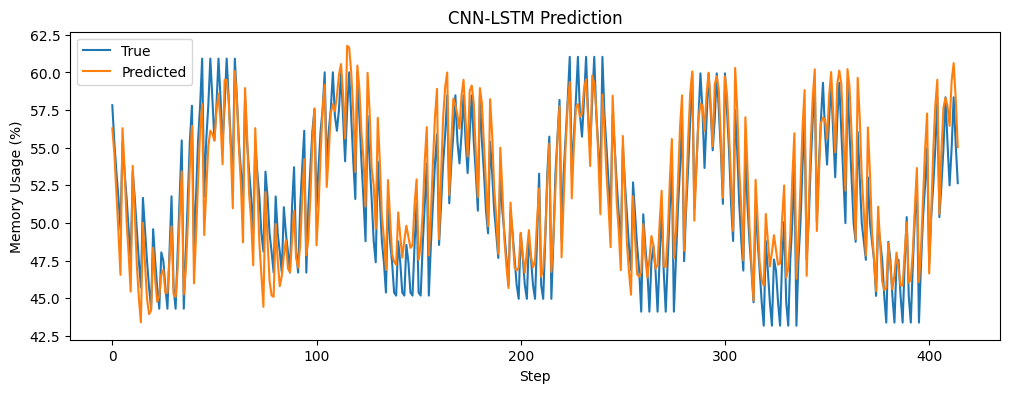

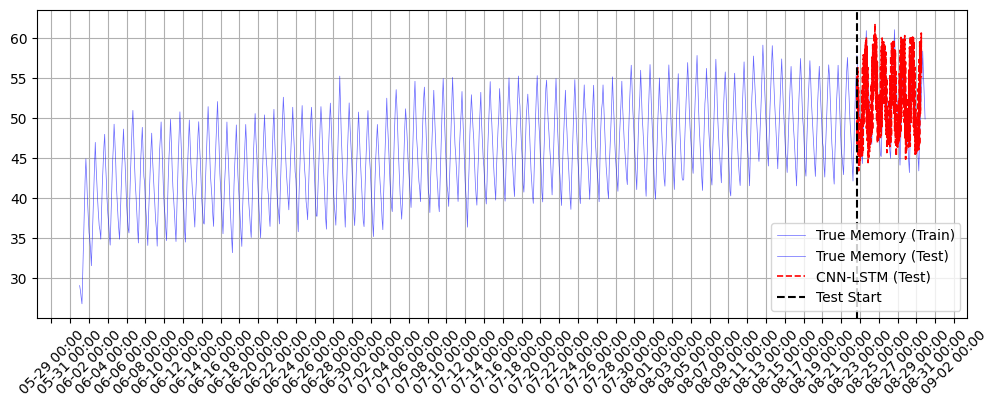

In [4]:
# plot

print("CNN-LSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R2:", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}


plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:1000], label="True")
plt.plot(pred_inv.flatten()[:1000], label="Predicted")
plt.title("CNN-LSTM Prediction")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)
test_start_idx = val_end + past_steps
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
train_series = df['memory_usage'][:test_start_idx]  # Test ÏãúÏûë Ï†ÑÍπåÏßÄ
val_series = df['memory_usage'][train_end:val_end] # validation data
test_series_true= df['memory_usage'][test_start_idx:]

# test_series_true = pd.Series(true_inv[:,0].flatten(), index=test_time_index) # test data (True)
all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp Îß§Ìïë
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # ÏÉòÌîå ÎÅùÎÇòÎäî ÏãúÏ†ê + (j+1)*5Î∂Ñ
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True Memory (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="CNN-LSTM (Test)", color="red", linestyle="--", linewidth = 1.2)
plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

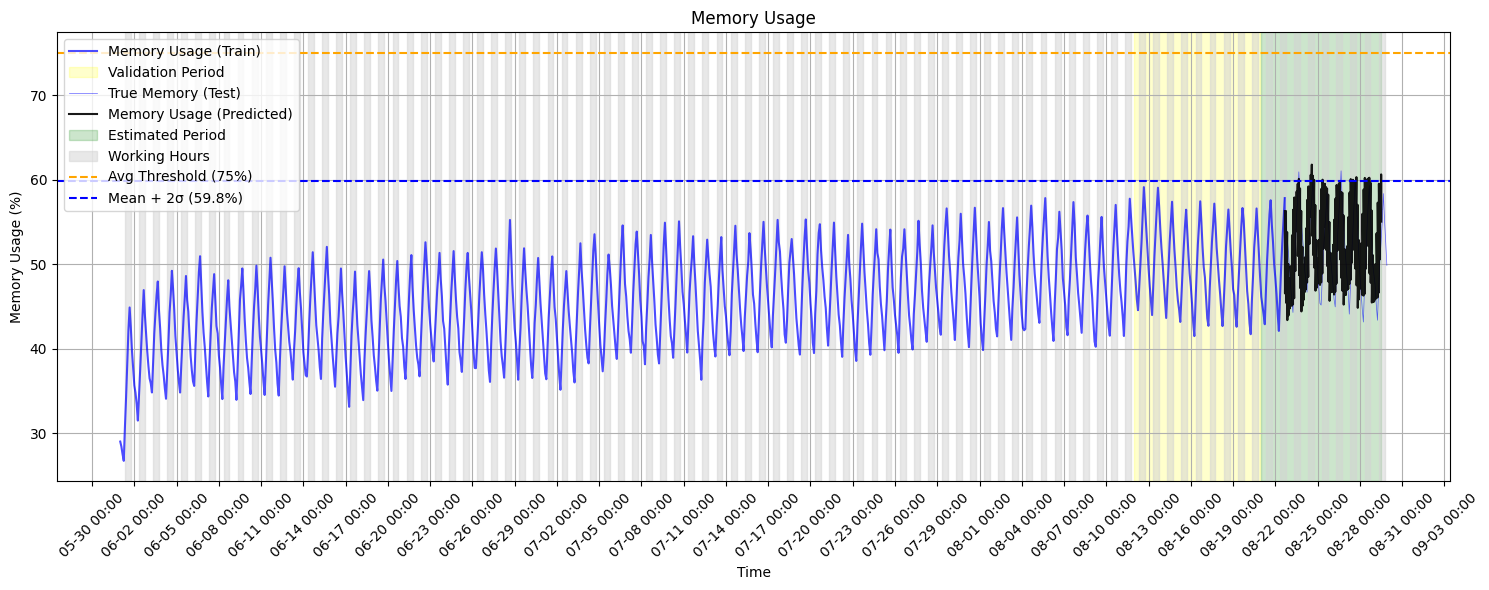

üìä Peak Î∞úÏÉù ÎπÑÏú®: 6.67%
‚úÖ Peak Í∏∞Ï§Ä ÎßåÏ°± Ïó¨Î∂Ä: True


In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Ï†ÑÏ≤¥ ÏòàÏ∏° ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ± (TrainÏùÄ Ïã§Ï†úÍ∞í, TestÎäî ÏòàÏ∏°Í∞í)
all_pred_series = pd.concat([
    df['memory_usage'][:test_time_index[0]],       # Train Íµ¨Í∞ÑÏùÄ Ïã§Ï†ú Ï∏°Ï†ïÍ∞í
    test_series_pred                      # Test Íµ¨Í∞ÑÏùÄ ÏòàÏ∏°Í∞í
])
all_pred_series.name = "memory_usage"

# 2. ÏóÖÎ¨¥ÏãúÍ∞Ñ (08:00~18:00), ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Ï∂îÏ∂ú
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. Ï°∞Í±¥ 1: ÌèâÍ∑† Memory ÏÇ¨Ïö©Î•† ‚â• 75% (ÏóÖÎ¨¥ÏãúÍ∞Ñ, ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Î∂ÑÎ¶¨)
avg_threshold = 75
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # ÏóÖÎ¨¥ÏãúÍ∞Ñ ÎòêÎäî ÎπÑÏóÖÎ¨¥ ÏãúÍ∞ÑÏóê average 80 % Ïù¥ÏÉÅÏù¥Î©¥ Ï¶ùÏÑ§ ÌïÑÏöî

# Ï°∞Í±¥2 ÏàòÏ†ï : Œº + 2œÉ Ïù¥ÏÉÅ // 90% Ïù¥ÏÉÅ Ï§ë Îçî ÎÜíÏùÄ Í≤ΩÏö∞Î•º ÌîºÌÅ¨Î°ú Í∞ÑÏ£º,  ÌîºÌÅ¨ Î∞úÏÉùÌïú ÎÇ†Ïù¥ Ï†ÑÏ≤¥Ïùò 80% Ïù¥ÏÉÅ
# abs_threshold = 90

mu = all_pred_series.mean()
sigma = all_pred_series.std()
rel_threshold = mu + 2 * sigma           # ÌèâÍ∑† + 2œÉ

# peak_threshold = max(abs_threshold, rel_threshold)
daily_peak_flags = all_pred_series > rel_threshold

daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.06   # cÎì±Í∏â ÌîºÌÅ¨ ÎπÑÏú® 6%

# 5. Ï¶ùÏÑ§ ÌåêÎã®
upgrade_flag = condition1_flag or condition2_flag

# 6. Upgrade ÌëúÏãúÌï† ÏãúÍ∞ÑÎåÄ ÏßÄÏ†ï
if condition1_flag:
    upgrade_times = work_time.index

elif condition2_flag:
    # Ï°∞Í±¥ 2 Ï∂©Ï°± Ïãú peak Î∞úÏÉùÏùº Í∏∞Ï§Ä
    peak_day_list = daily_peak[daily_peak].index[:5]  # ÏµúÎåÄ 5Ïùº
    # upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
    upgrade_times = work_time[pd.Index(work_time.index.date).isin(peak_day_list)].index
else:
    upgrade_times = []

# 7. ÏãúÍ∞ÅÌôî (TrainÍ≥º Test ÏÉâÏÉÅ Íµ¨Î∂Ñ)
fig, ax = plt.subplots(figsize=(15, 6))

# Train Íµ¨Í∞Ñ
train_series = df['memory_usage'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="Memory Usage (Train)", color="blue", alpha=0.7)

# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test Íµ¨Í∞Ñ
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test Ï†ïÎãµÍ∞í
ax.plot(test_series_pred.index, test_series_pred.values, label="Memory Usage (Predicted)", color="black",alpha=0.9)
# test_start = test_series_pred.index[0]
# test_end = test_series_pred.index[-1]
test_context_start = mem_test.index[0]   # Ïª®ÌÖçÏä§Ìä∏ ÏãúÏûë
test_pred_start    = test_series_pred.index[0]
test_end           = test_series_pred.index[-1]

ax.axvspan(test_context_start, test_end, color='green', alpha=0.2, label="Estimated Period")
# ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# ÏóÖÎ¨¥ÏãúÍ∞Ñ Î∞∞Í≤Ω ÏÉâÏπ†
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # Ï≤´ Î≤àÏß∏ÏóêÎßå ÎùºÎ≤® Î∂ÄÏó¨
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# Í∏∞Ï§ÄÏÑ†
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (75%)")
plt.axhline(rel_threshold, color="blue", linestyle="--", label=f"Mean + 2œÉ ({rel_threshold:.1f}%)")
# plt.axhline(abs_threshold, color="green", linestyle="--", label=f"90th Percentile ({abs_threshold:.1f}%)")
# plt.axhline(peak_threshold, color="red", linestyle="-.", label=f"Mixed Threshold ({peak_threshold:.1f}%)")

# ÎßàÎ¨¥Î¶¨ ÏÑ§Ï†ï
ax.set_title("Memory Usage")
ax.set_xlabel("Time")
ax.set_ylabel("Memory Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# ‚úÖ Peak Í∏∞Ï§Ä Í∞í Í≥ÑÏÇ∞
peak_ratio = (peak_days / total_days) * 100  # ÌçºÏÑºÌä∏(%)

# ‚úÖ Ï°∞Í±¥ 2 Í≤∞Í≥º Ï∂úÎ†•

print(f"üìä Peak Î∞úÏÉù ÎπÑÏú®: {peak_ratio:.2f}%")
print(f"‚úÖ Peak Í∏∞Ï§Ä ÎßåÏ°± Ïó¨Î∂Ä: {condition2_flag}")

# streamlit ÏúÑÌïú csv Ï†ÄÏû•

# ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï†ÄÏû•
Memory_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
Memory_avg_df.to_csv("Memory_avg_usage_CNN-LSTM.csv", index=False)

import json
with open("Memory_accuracy_metrics_CNN-LSTM.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("Memory_all_series_CNN-LSTM.csv") # Ï†ÑÏ≤¥ Memory
test_series_pred.to_csv("Memory_usage_predicted_only_CNN-LSTM.csv") # ÏòàÏ∏° Íµ¨Í∞Ñ Memory
work_time.to_csv("Memory_usage_working_hours_CNN-LSTM.csv") # ÏóÖÎ¨¥ÏãúÍ∞Ñ Memory
daily_peak.to_csv("Memory_peak_flag_per_day_CNN-LSTM.csv") # peak Î∞úÏÉù Ïó¨Î∂Ä

with open("Memory_upgrade_decision_CNN-LSTM.txt", "w") as f: # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïú†Î¨¥
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("Memory_plot_CNN-LSTM.png")

## 2. CNN

ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ   : 48.54%
ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ : 44.44%


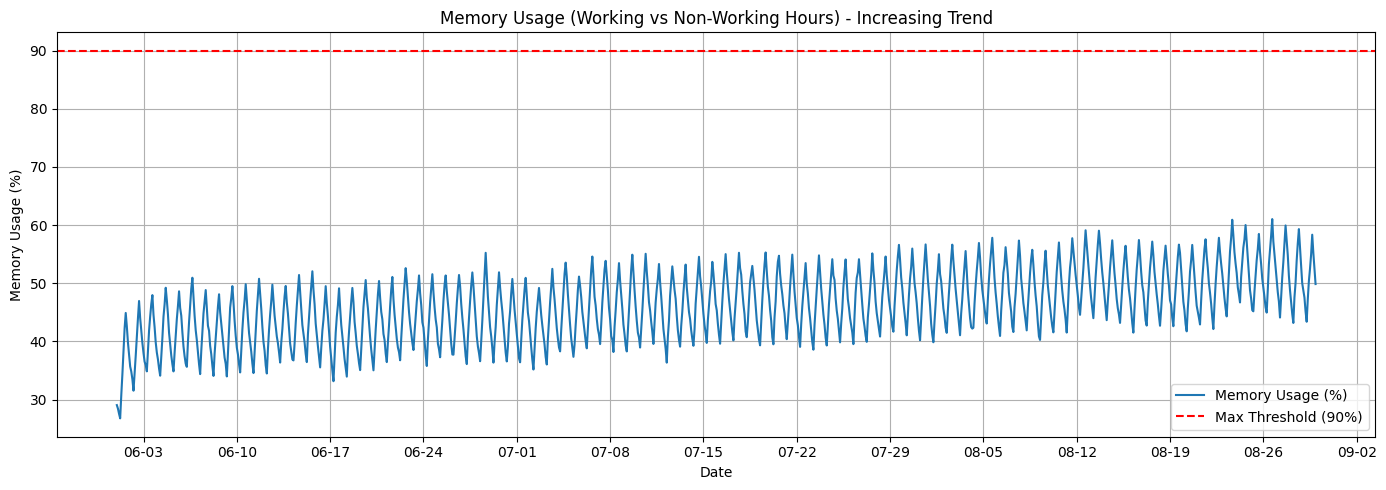

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 46ms/step - loss: 0.2453 - val_loss: 0.2590
Epoch 2/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.0395 - val_loss: 0.1373
Epoch 3/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0289 - val_loss: 0.0614
Epoch 4/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0215 - val_loss: 0.0364
Epoch 5/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0173 - val_loss: 0.0344
Epoch 6/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0142 - val_loss: 0.0280
Epoch 7/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0133 - val_loss: 0.0345
Epoch 8/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0120 - val_loss: 0.0312
Epoch 9/20
53/53 ‚

1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 278ms/step

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 152ms/step

=== Test Metrics ===
MAE : 2.2058
RMSE: 2.67
R¬≤  : 0.6692


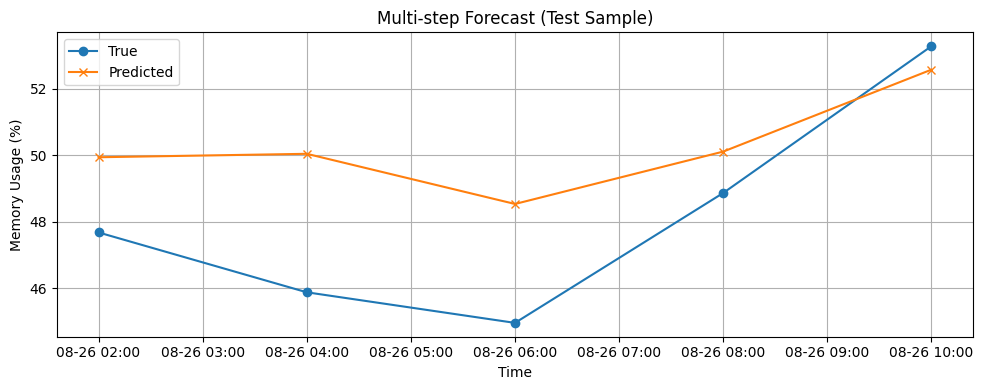

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, BatchNormalization, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense



# =========================================================
# 2) DataFrame Íµ¨ÏÑ± Î∞è ÏöîÏïΩ ÌÜµÍ≥Ñ
# =========================================================
df = pd.DataFrame({"timestamp": time_index, "memory_usage": memory_usage}).set_index("timestamp")

# ÏóÖÎ¨¥/ÎπÑÏóÖÎ¨¥ ÌèâÍ∑†
working_hour_mask = (df.index.hour >= 8) & (df.index.hour < 18)
working_hour_avg = df.loc[working_hour_mask, "memory_usage"].mean()
non_working_hour_avg = df.loc[~working_hour_mask, "memory_usage"].mean()

print(f"ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ   : {working_hour_avg:.2f}%")
print(f"ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ : {non_working_hour_avg:.2f}%")

# =========================================================
# 3) ÏãúÍ∞ÅÌôî(Ïõê Îç∞Ïù¥ÌÑ∞)
# =========================================================
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["memory_usage"], label="Memory Usage (%)")
plt.axhline(threshold, color="red", linestyle="--", label="Max Threshold (90%)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.title("Memory Usage (Working vs Non-Working Hours) - Increasing Trend")
plt.xlabel("Date")
plt.ylabel("Memory Usage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# 4) Ïä§ÏºÄÏùºÎßÅ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# =========================================================
scaler = MinMaxScaler()
mem_scaled = scaler.fit_transform(df[["memory_usage"]].values)  # (N, 1)
mem_scaled = pd.DataFrame(mem_scaled, index=df.index, columns=["memory_usage"])

past_steps = 20
future_steps = 5

n_total = len(mem_scaled)
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)

mem_train = mem_scaled.iloc[:n_train]
mem_val   = mem_scaled.iloc[n_train:n_train+n_val]
mem_test  = mem_scaled.iloc[n_train+n_val:]

# =========================================================
# 5) ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
#    - Í∞Å subset(Train/Val/Test)ÏóêÏÑú ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÏãúÌÄÄÏä§Î•º ÏÉùÏÑ±
# =========================================================
def create_sequences(df_1col, past_steps=20, future_steps=5):
    """
    df_1col: 1Ïó¥ DataFrame (indexÎäî datetime)
    Returns:
      X: (samples, past_steps, 1)
      y: (samples, future_steps)
    """
    data = df_1col.values  # (N, 1)
    X, y = [], []
    for i in range(len(data) - past_steps - future_steps):
        X.append(data[i:i+past_steps])                         # (past_steps, 1)
        y.append(data[i+past_steps:i+past_steps+future_steps]) # (future_steps, 1)
    X = np.array(X)
    y = np.array(y).squeeze(-1)
    return X, y

X_train, y_train = create_sequences(mem_train, past_steps, future_steps)
X_val,   y_val   = create_sequences(mem_val,   past_steps, future_steps)
X_test,  y_test  = create_sequences(mem_test,  past_steps, future_steps)

# Î∞©Ïñ¥ÏΩîÎìú: ÏãúÌÄÄÏä§Í∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏùÑ Ï†ïÎèÑÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßßÏùÄÏßÄ ÌôïÏù∏
assert len(X_train) and len(X_val) and len(X_test), "ÏãúÌÄÄÏä§Í∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. past_steps/future_stepsÎ•º Ï§ÑÏó¨Î≥¥ÏÑ∏Ïöî."

# =========================================================
# 6) Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ (CNN-only)
# =========================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),

    GlobalAveragePooling1D(),        # ÏãúÍ≥ÑÏó¥ Ï∂ï ÌèâÍ∑† ÌíÄÎßÅÏúºÎ°ú ÌäπÏßï ÏßëÏïΩ
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(future_steps)              # Î©ÄÌã∞Ïä§ÌÖù Ï∂úÎ†•
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)

# =========================================================
# 7) ÏòàÏ∏°/Ïó≠Ïä§ÏºÄÏùº Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
# =========================================================
pred = model.predict(X_test)  # (samples, future_steps)
true = y_test                 # (samples, future_steps)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ: ÌèâÌÉÑÌôî ‚Üí inverse_transform ‚Üí ÏõêÌòï Î≥µÏõê
pred_inv = scaler.inverse_transform(pred.reshape(-1, 1)).reshape(-1, future_steps)
true_inv = scaler.inverse_transform(true.reshape(-1, 1)).reshape(-1, future_steps)

mae  = mean_absolute_error(true_inv.ravel(), pred_inv.ravel())
rmse = np.sqrt(mean_squared_error(true_inv.ravel(), pred_inv.ravel()))
r2   = r2_score(true_inv.ravel(), pred_inv.ravel())

print("\n=== Test Metrics ===")
print("MAE :", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("R¬≤  :", round(r2, 4))

# =========================================================
# 8) ÏòàÏ∏° ÏãúÍ∞ÅÌôî (ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ Ï§ë ÏûÑÏùòÏùò ÏÉòÌîå 1Í∞ú)
#    - ÏÉòÌîå kÏóê ÎåÄÌï¥, future_steps Íµ¨Í∞ÑÏùò Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÎπÑÍµê
#    - ÏãúÍ∞ÑÏ∂ïÏùÄ mem_test.indexÎ•º ÏÇ¨Ïö©Ìï¥ Ï†ïÎ†¨
# =========================================================
k = len(X_test) // 2  # Ï§ëÍ∞Ñ ÏÉòÌîå
start_idx = past_steps + k
end_idx = start_idx + future_steps
ts_window = mem_test.index[start_idx:end_idx]  # ÏòàÏ∏° ÎåÄÏÉÅ ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ

plt.figure(figsize=(10, 4))
plt.plot(ts_window, true_inv[k], marker='o', label="True")
plt.plot(ts_window, pred_inv[k], marker='x', label="Predicted")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.title("Multi-step Forecast (Test Sample)")
plt.xlabel("Time")
plt.ylabel("Memory Usage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


CNN
MAE : 2.2058319905724515
RMSE: 2.669963245145419
R2: 0.6692263044667786


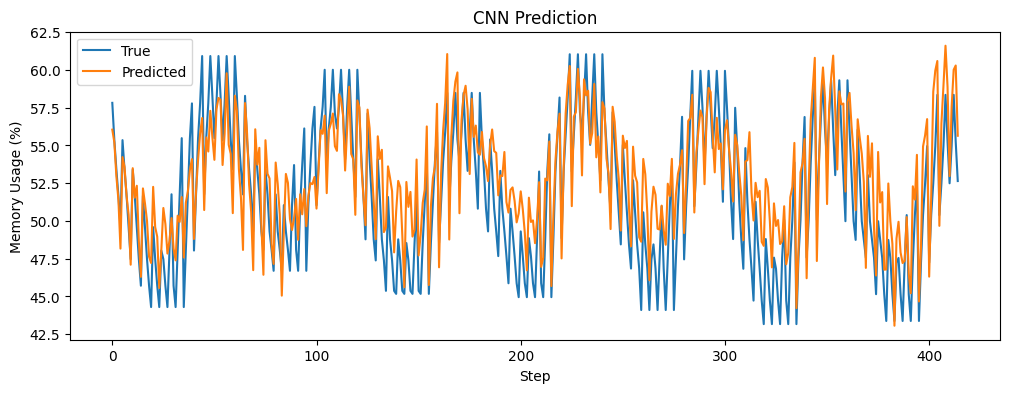

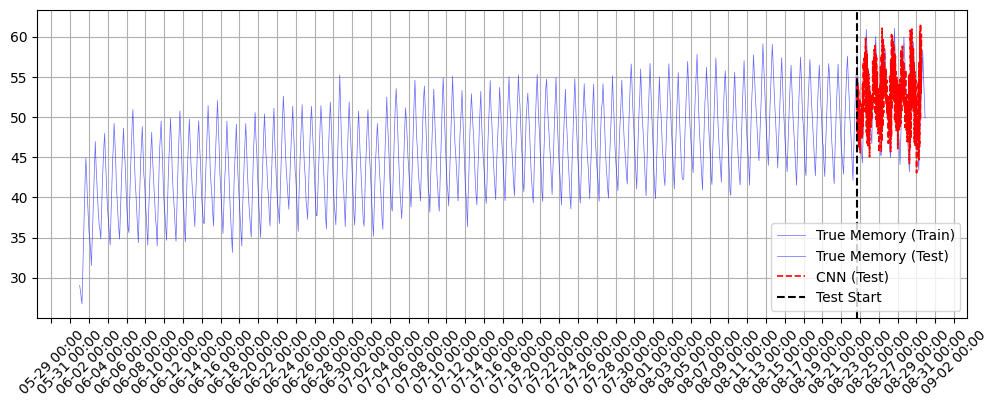

In [9]:
# plot

print("CNN")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R2:", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}


plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:1000], label="True")
plt.plot(pred_inv.flatten()[:1000], label="Predicted")
plt.title("CNN Prediction")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)
test_start_idx = val_end + past_steps
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
train_series = df['memory_usage'][:test_start_idx]  # Test ÏãúÏûë Ï†ÑÍπåÏßÄ
val_series = df['memory_usage'][train_end:val_end] # validation data
test_series_true= df['memory_usage'][test_start_idx:]

# test_series_true = pd.Series(true_inv[:,0].flatten(), index=test_time_index) # test data (True)
all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp Îß§Ìïë
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # ÏÉòÌîå ÎÅùÎÇòÎäî ÏãúÏ†ê + (j+1)*5Î∂Ñ
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True Memory (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="CNN (Test)", color="red", linestyle="--", linewidth = 1.2)
plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

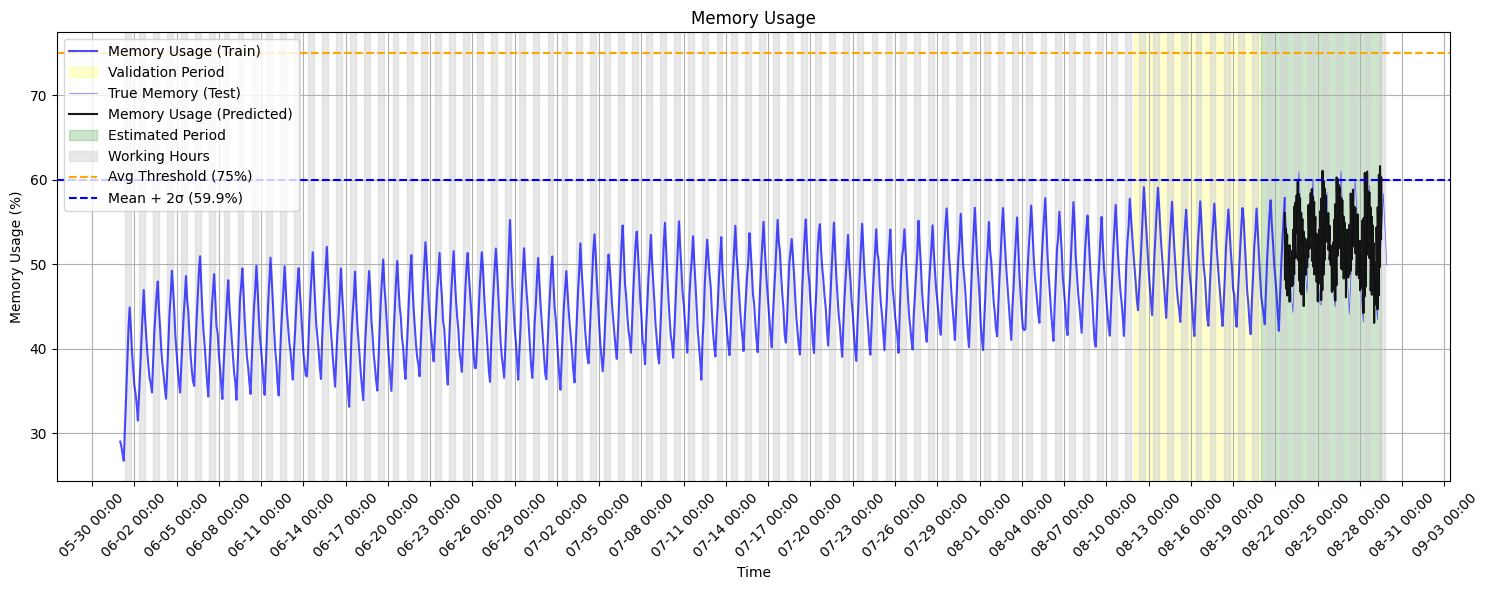

üìä Peak Î∞úÏÉù ÎπÑÏú®: 4.44%
‚úÖ Peak Í∏∞Ï§Ä ÎßåÏ°± Ïó¨Î∂Ä: False


In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Ï†ÑÏ≤¥ ÏòàÏ∏° ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ± (TrainÏùÄ Ïã§Ï†úÍ∞í, TestÎäî ÏòàÏ∏°Í∞í)
all_pred_series = pd.concat([
    df['memory_usage'][:test_time_index[0]],       # Train Íµ¨Í∞ÑÏùÄ Ïã§Ï†ú Ï∏°Ï†ïÍ∞í
    test_series_pred                      # Test Íµ¨Í∞ÑÏùÄ ÏòàÏ∏°Í∞í
])
all_pred_series.name = "memory_usage"

# 2. ÏóÖÎ¨¥ÏãúÍ∞Ñ (08:00~18:00), ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Ï∂îÏ∂ú
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. Ï°∞Í±¥ 1: ÌèâÍ∑† Memory ÏÇ¨Ïö©Î•† ‚â• 75% (ÏóÖÎ¨¥ÏãúÍ∞Ñ, ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Î∂ÑÎ¶¨)
avg_threshold = 75
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # ÏóÖÎ¨¥ÏãúÍ∞Ñ ÎòêÎäî ÎπÑÏóÖÎ¨¥ ÏãúÍ∞ÑÏóê average 80 % Ïù¥ÏÉÅÏù¥Î©¥ Ï¶ùÏÑ§ ÌïÑÏöî

# Ï°∞Í±¥2 ÏàòÏ†ï : Œº + 2œÉ Ïù¥ÏÉÅ
mu = all_pred_series.mean()
sigma = all_pred_series.std()
rel_threshold = mu + 2 * sigma           # ÌèâÍ∑† + 2œÉ
daily_peak_flags = all_pred_series > rel_threshold

daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.06   # cÎì±Í∏â ÌîºÌÅ¨ ÎπÑÏú® 6%

# 5. Ï¶ùÏÑ§ ÌåêÎã®
upgrade_flag = condition1_flag or condition2_flag

# 6. Upgrade ÌëúÏãúÌï† ÏãúÍ∞ÑÎåÄ ÏßÄÏ†ï
if condition1_flag:
    upgrade_times = work_time.index

elif condition2_flag:
    # Ï°∞Í±¥ 2 Ï∂©Ï°± Ïãú peak Î∞úÏÉùÏùº Í∏∞Ï§Ä
    peak_day_list = daily_peak[daily_peak].index[:5]  # ÏµúÎåÄ 5Ïùº
    # upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
    upgrade_times = work_time[pd.Index(work_time.index.date).isin(peak_day_list)].index
else:
    upgrade_times = []

# 7. ÏãúÍ∞ÅÌôî (TrainÍ≥º Test ÏÉâÏÉÅ Íµ¨Î∂Ñ)
fig, ax = plt.subplots(figsize=(15, 6))

# Train Íµ¨Í∞Ñ
train_series = df['memory_usage'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="Memory Usage (Train)", color="blue", alpha=0.7)

# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test Íµ¨Í∞Ñ
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test Ï†ïÎãµÍ∞í
ax.plot(test_series_pred.index, test_series_pred.values, label="Memory Usage (Predicted)", color="black",alpha=0.9)
# test_start = test_series_pred.index[0]
# test_end = test_series_pred.index[-1]
test_context_start = mem_test.index[0]   # Ïª®ÌÖçÏä§Ìä∏ ÏãúÏûë
test_pred_start    = test_series_pred.index[0]
test_end           = test_series_pred.index[-1]

ax.axvspan(test_context_start, test_end, color='green', alpha=0.2, label="Estimated Period")
# ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# ÏóÖÎ¨¥ÏãúÍ∞Ñ Î∞∞Í≤Ω ÏÉâÏπ†
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # Ï≤´ Î≤àÏß∏ÏóêÎßå ÎùºÎ≤® Î∂ÄÏó¨
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# Í∏∞Ï§ÄÏÑ†
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (75%)")
plt.axhline(rel_threshold, color="blue", linestyle="--", label=f"Mean + 2œÉ ({rel_threshold:.1f}%)")
# plt.axhline(abs_threshold, color="green", linestyle="--", label=f"90th Percentile ({abs_threshold:.1f}%)")
# plt.axhline(peak_threshold, color="red", linestyle="-.", label=f"Mixed Threshold ({peak_threshold:.1f}%)")

# ÎßàÎ¨¥Î¶¨ ÏÑ§Ï†ï
ax.set_title("Memory Usage")
ax.set_xlabel("Time")
ax.set_ylabel("Memory Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# ‚úÖ Peak Í∏∞Ï§Ä Í∞í Í≥ÑÏÇ∞
peak_ratio = (peak_days / total_days) * 100  # ÌçºÏÑºÌä∏(%)

# ‚úÖ Ï°∞Í±¥ 2 Í≤∞Í≥º Ï∂úÎ†•

print(f"üìä Peak Î∞úÏÉù ÎπÑÏú®: {peak_ratio:.2f}%")
print(f"‚úÖ Peak Í∏∞Ï§Ä ÎßåÏ°± Ïó¨Î∂Ä: {condition2_flag}")

# streamlit ÏúÑÌïú csv Ï†ÄÏû•

# ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï†ÄÏû•
Memory_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
Memory_avg_df.to_csv("Memory_avg_usage_CNN.csv", index=False)

import json
with open("Memory_accuracy_metrics_CNN.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("Memory_all_series_CNN.csv") # Ï†ÑÏ≤¥ Memory
test_series_pred.to_csv("Memory_usage_predicted_only_CNN.csv") # ÏòàÏ∏° Íµ¨Í∞Ñ Memory
work_time.to_csv("Memory_usage_working_hours_CNN.csv") # ÏóÖÎ¨¥ÏãúÍ∞Ñ Memory
daily_peak.to_csv("Memory_peak_flag_per_day_CNN.csv") # peak Î∞úÏÉù Ïó¨Î∂Ä

with open("Memory_upgrade_decision_CNN.txt", "w") as f: # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïú†Î¨¥
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("Memory_plot_CNN.png")

## Bi-LSTM

ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ   : 48.54%
ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ : 44.44%


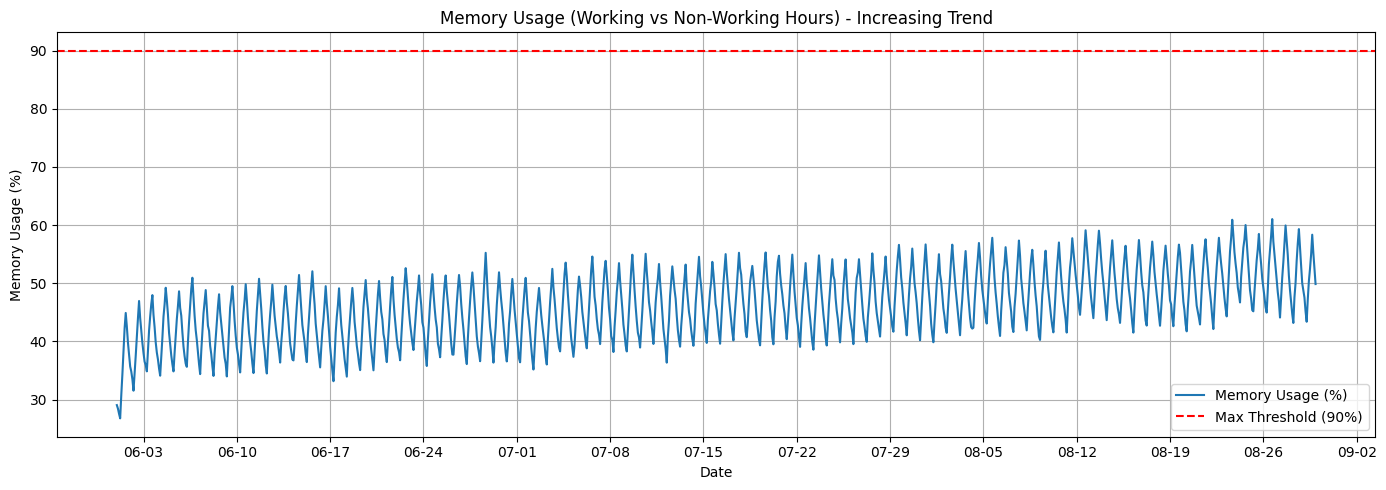

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 27ms/step - loss: 0.0645 - val_loss: 0.0183
Epoch 2/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - loss: 0.0207 - val_loss: 0.0162
Epoch 3/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - loss: 0.0175 - val_loss: 0.0106
Epoch 4/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0109 - val_loss: 0.0031
Epoch 5/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 16ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 6/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - loss: 0.0064 - val_loss: 0.0023
Epoch 7/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - loss: 0.0060 - val_loss: 0.0018
Epoch 8/20
53/53 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - loss: 0.0060 - val_loss: 0.0011
Epoch 9/20


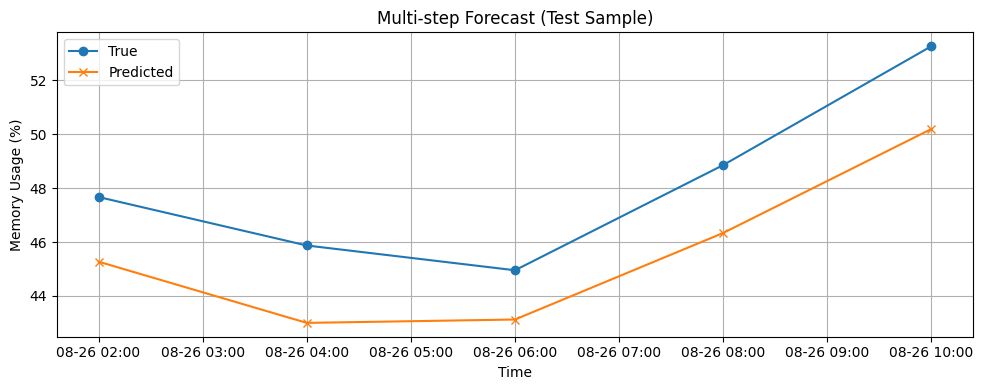

In [11]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, BatchNormalization, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense



# =========================================================
# 2) DataFrame Íµ¨ÏÑ± Î∞è ÏöîÏïΩ ÌÜµÍ≥Ñ
# =========================================================
df = pd.DataFrame({"timestamp": time_index, "memory_usage": memory_usage}).set_index("timestamp")

# ÏóÖÎ¨¥/ÎπÑÏóÖÎ¨¥ ÌèâÍ∑†
working_hour_mask = (df.index.hour >= 8) & (df.index.hour < 18)
working_hour_avg = df.loc[working_hour_mask, "memory_usage"].mean()
non_working_hour_avg = df.loc[~working_hour_mask, "memory_usage"].mean()

print(f"ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ   : {working_hour_avg:.2f}%")
print(f"ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ : {non_working_hour_avg:.2f}%")

# =========================================================
# 3) ÏãúÍ∞ÅÌôî(Ïõê Îç∞Ïù¥ÌÑ∞)
# =========================================================
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["memory_usage"], label="Memory Usage (%)")
plt.axhline(threshold, color="red", linestyle="--", label="Max Threshold (90%)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.title("Memory Usage (Working vs Non-Working Hours) - Increasing Trend")
plt.xlabel("Date")
plt.ylabel("Memory Usage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# 4) Ïä§ÏºÄÏùºÎßÅ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# =========================================================
scaler = MinMaxScaler()
mem_scaled = scaler.fit_transform(df[["memory_usage"]].values)  # (N, 1)
mem_scaled = pd.DataFrame(mem_scaled, index=df.index, columns=["memory_usage"])

past_steps = 20
future_steps = 5

n_total = len(mem_scaled)
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)

mem_train = mem_scaled.iloc[:n_train]
mem_val   = mem_scaled.iloc[n_train:n_train+n_val]
mem_test  = mem_scaled.iloc[n_train+n_val:]

# =========================================================
# 5) ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
#    - Í∞Å subset(Train/Val/Test)ÏóêÏÑú ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÏãúÌÄÄÏä§Î•º ÏÉùÏÑ±
# =========================================================
def create_sequences(df_1col, past_steps=20, future_steps=5):
    """
    df_1col: 1Ïó¥ DataFrame (indexÎäî datetime)
    Returns:
      X: (samples, past_steps, 1)
      y: (samples, future_steps)
    """
    data = df_1col.values  # (N, 1)
    X, y = [], []
    for i in range(len(data) - past_steps - future_steps):
        X.append(data[i:i+past_steps])                         # (past_steps, 1)
        y.append(data[i+past_steps:i+past_steps+future_steps]) # (future_steps, 1)
    X = np.array(X)
    y = np.array(y).squeeze(-1)
    return X, y

X_train, y_train = create_sequences(mem_train, past_steps, future_steps)
X_val,   y_val   = create_sequences(mem_val,   past_steps, future_steps)
X_test,  y_test  = create_sequences(mem_test,  past_steps, future_steps)

# Î∞©Ïñ¥ÏΩîÎìú: ÏãúÌÄÄÏä§Í∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏùÑ Ï†ïÎèÑÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßßÏùÄÏßÄ ÌôïÏù∏
assert len(X_train) and len(X_val) and len(X_test), "ÏãúÌÄÄÏä§Í∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. past_steps/future_stepsÎ•º Ï§ÑÏó¨Î≥¥ÏÑ∏Ïöî."
# =========================================================
# 6) Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ (Bi-LSTM)
# =========================================================
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(past_steps, 1)),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(future_steps)  # Î©ÄÌã∞Ïä§ÌÖù Ï∂úÎ†•
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_val, y_val),
    shuffle=False,        # ÏãúÍ≥ÑÏó¥Ïù¥ÎØÄÎ°ú ÏÑûÏßÄ ÏïäÏùå
    verbose=1
)

# =========================================================
# 7) ÏòàÏ∏°/Ïó≠Ïä§ÏºÄÏùº Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
# =========================================================
pred = model.predict(X_test)  # (samples, future_steps)
true = y_test                 # (samples, future_steps)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ: ÌèâÌÉÑÌôî ‚Üí inverse_transform ‚Üí ÏõêÌòï Î≥µÏõê
pred_inv = scaler.inverse_transform(pred.reshape(-1, 1)).reshape(-1, future_steps)
true_inv = scaler.inverse_transform(true.reshape(-1, 1)).reshape(-1, future_steps)

mae  = mean_absolute_error(true_inv.ravel(), pred_inv.ravel())
rmse = np.sqrt(mean_squared_error(true_inv.ravel(), pred_inv.ravel()))
r2   = r2_score(true_inv.ravel(), pred_inv.ravel())

print("\n=== Test Metrics ===")
print("MAE :", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("R¬≤  :", round(r2, 4))

# =========================================================
# 8) ÏòàÏ∏° ÏãúÍ∞ÅÌôî (ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ Ï§ë ÏûÑÏùòÏùò ÏÉòÌîå 1Í∞ú)
#    - ÏÉòÌîå kÏóê ÎåÄÌï¥, future_steps Íµ¨Í∞ÑÏùò Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÎπÑÍµê
#    - ÏãúÍ∞ÑÏ∂ïÏùÄ mem_test.indexÎ•º ÏÇ¨Ïö©Ìï¥ Ï†ïÎ†¨
# =========================================================
k = len(X_test) // 2  # Ï§ëÍ∞Ñ ÏÉòÌîå
start_idx = past_steps + k
end_idx = start_idx + future_steps
ts_window = mem_test.index[start_idx:end_idx]  # ÏòàÏ∏° ÎåÄÏÉÅ ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ

plt.figure(figsize=(10, 4))
plt.plot(ts_window, true_inv[k], marker='o', label="True")
plt.plot(ts_window, pred_inv[k], marker='x', label="Predicted")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.title("Multi-step Forecast (Test Sample)")
plt.xlabel("Time")
plt.ylabel("Memory Usage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Bi-LSTM
MAE : 1.8968049646730472
RMSE: 2.2986789550960043
R2: 0.7546444813825254


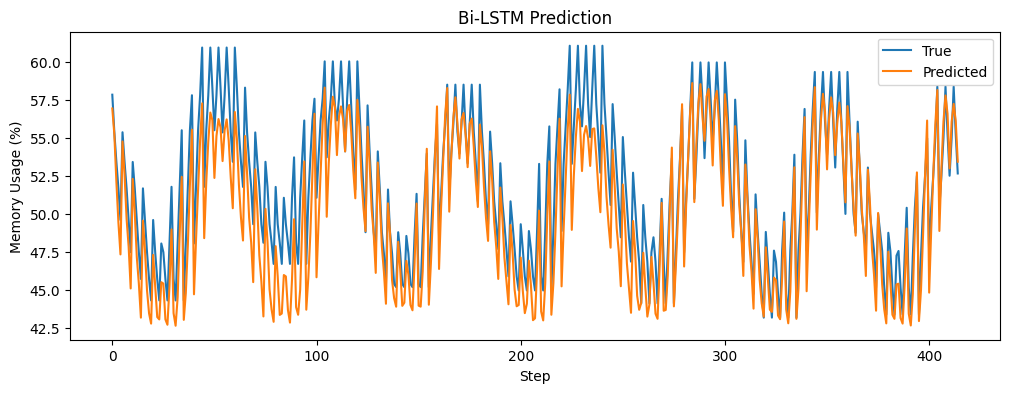

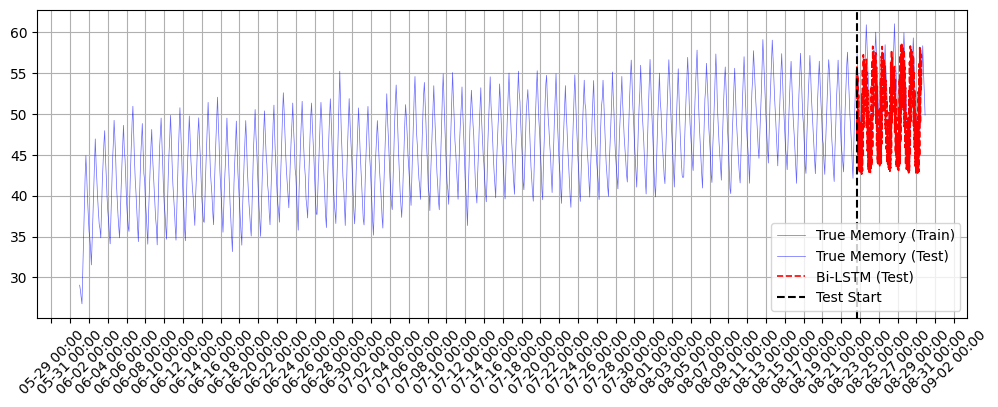

In [12]:
# plot

print("Bi-LSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R2:", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}


plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:1000], label="True")
plt.plot(pred_inv.flatten()[:1000], label="Predicted")
plt.title("Bi-LSTM Prediction")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)
test_start_idx = val_end + past_steps
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
train_series = df['memory_usage'][:test_start_idx]  # Test ÏãúÏûë Ï†ÑÍπåÏßÄ
val_series = df['memory_usage'][train_end:val_end] # validation data
test_series_true= df['memory_usage'][test_start_idx:]

# test_series_true = pd.Series(true_inv[:,0].flatten(), index=test_time_index) # test data (True)
all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp Îß§Ìïë
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # ÏÉòÌîå ÎÅùÎÇòÎäî ÏãúÏ†ê + (j+1)*5Î∂Ñ
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True Memory (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="Bi-LSTM (Test)", color="red", linestyle="--", linewidth = 1.2)
plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

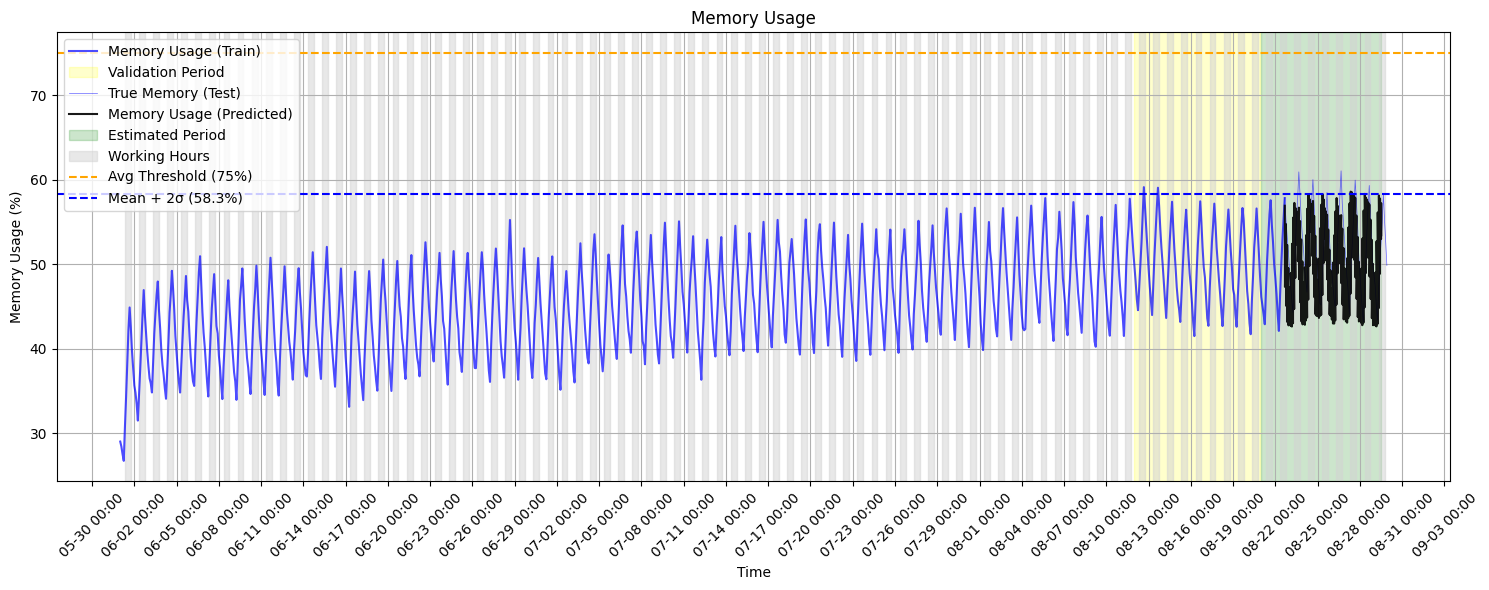

üìä Peak Î∞úÏÉù ÎπÑÏú®: 5.56%
‚úÖ Peak Í∏∞Ï§Ä ÎßåÏ°± Ïó¨Î∂Ä: False


In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Ï†ÑÏ≤¥ ÏòàÏ∏° ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ± (TrainÏùÄ Ïã§Ï†úÍ∞í, TestÎäî ÏòàÏ∏°Í∞í)
all_pred_series = pd.concat([
    df['memory_usage'][:test_time_index[0]],       # Train Íµ¨Í∞ÑÏùÄ Ïã§Ï†ú Ï∏°Ï†ïÍ∞í
    test_series_pred                      # Test Íµ¨Í∞ÑÏùÄ ÏòàÏ∏°Í∞í
])
all_pred_series.name = "memory_usage"

# 2. ÏóÖÎ¨¥ÏãúÍ∞Ñ (08:00~18:00), ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Ï∂îÏ∂ú
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. Ï°∞Í±¥ 1: ÌèâÍ∑† Memory ÏÇ¨Ïö©Î•† ‚â• 75% (ÏóÖÎ¨¥ÏãúÍ∞Ñ, ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Î∂ÑÎ¶¨)
avg_threshold = 75
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # ÏóÖÎ¨¥ÏãúÍ∞Ñ ÎòêÎäî ÎπÑÏóÖÎ¨¥ ÏãúÍ∞ÑÏóê average 80 % Ïù¥ÏÉÅÏù¥Î©¥ Ï¶ùÏÑ§ ÌïÑÏöî

# Ï°∞Í±¥2 ÏàòÏ†ï : Œº + 2œÉ Ïù¥ÏÉÅ
mu = all_pred_series.mean()
sigma = all_pred_series.std()
rel_threshold = mu + 2 * sigma           # ÌèâÍ∑† + 2œÉ
daily_peak_flags = all_pred_series > rel_threshold

daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.06   # cÎì±Í∏â ÌîºÌÅ¨ ÎπÑÏú® 6%

# 5. Ï¶ùÏÑ§ ÌåêÎã®
upgrade_flag = condition1_flag or condition2_flag

# 6. Upgrade ÌëúÏãúÌï† ÏãúÍ∞ÑÎåÄ ÏßÄÏ†ï
if condition1_flag:
    upgrade_times = work_time.index

elif condition2_flag:
    # Ï°∞Í±¥ 2 Ï∂©Ï°± Ïãú peak Î∞úÏÉùÏùº Í∏∞Ï§Ä
    peak_day_list = daily_peak[daily_peak].index[:5]  # ÏµúÎåÄ 5Ïùº
    # upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
    upgrade_times = work_time[pd.Index(work_time.index.date).isin(peak_day_list)].index
else:
    upgrade_times = []

# 7. ÏãúÍ∞ÅÌôî (TrainÍ≥º Test ÏÉâÏÉÅ Íµ¨Î∂Ñ)
fig, ax = plt.subplots(figsize=(15, 6))

# Train Íµ¨Í∞Ñ
train_series = df['memory_usage'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="Memory Usage (Train)", color="blue", alpha=0.7)

# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test Íµ¨Í∞Ñ
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test Ï†ïÎãµÍ∞í
ax.plot(test_series_pred.index, test_series_pred.values, label="Memory Usage (Predicted)", color="black",alpha=0.9)
# test_start = test_series_pred.index[0]
# test_end = test_series_pred.index[-1]
test_context_start = mem_test.index[0]   # Ïª®ÌÖçÏä§Ìä∏ ÏãúÏûë
test_pred_start    = test_series_pred.index[0]
test_end           = test_series_pred.index[-1]

ax.axvspan(test_context_start, test_end, color='green', alpha=0.2, label="Estimated Period")
# ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# ÏóÖÎ¨¥ÏãúÍ∞Ñ Î∞∞Í≤Ω ÏÉâÏπ†
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # Ï≤´ Î≤àÏß∏ÏóêÎßå ÎùºÎ≤® Î∂ÄÏó¨
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# Í∏∞Ï§ÄÏÑ†
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (75%)")
plt.axhline(rel_threshold, color="blue", linestyle="--", label=f"Mean + 2œÉ ({rel_threshold:.1f}%)")
# plt.axhline(abs_threshold, color="green", linestyle="--", label=f"90th Percentile ({abs_threshold:.1f}%)")
# plt.axhline(peak_threshold, color="red", linestyle="-.", label=f"Mixed Threshold ({peak_threshold:.1f}%)")

# ÎßàÎ¨¥Î¶¨ ÏÑ§Ï†ï
ax.set_title("Memory Usage")
ax.set_xlabel("Time")
ax.set_ylabel("Memory Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# ‚úÖ Peak Í∏∞Ï§Ä Í∞í Í≥ÑÏÇ∞
peak_ratio = (peak_days / total_days) * 100  # ÌçºÏÑºÌä∏(%)

# ‚úÖ Ï°∞Í±¥ 2 Í≤∞Í≥º Ï∂úÎ†•

print(f"üìä Peak Î∞úÏÉù ÎπÑÏú®: {peak_ratio:.2f}%")
print(f"‚úÖ Peak Í∏∞Ï§Ä ÎßåÏ°± Ïó¨Î∂Ä: {condition2_flag}")

# streamlit ÏúÑÌïú csv Ï†ÄÏû•

# ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï†ÄÏû•
Memory_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
Memory_avg_df.to_csv("Memory_avg_usage_Bi-LSTM.csv", index=False)

import json
with open("Memory_accuracy_metrics_Bi-LSTM.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("Memory_all_series_Bi-LSTM.csv") # Ï†ÑÏ≤¥ Memory
test_series_pred.to_csv("Memory_usage_predicted_only_Bi-LSTM.csv") # ÏòàÏ∏° Íµ¨Í∞Ñ Memory
work_time.to_csv("Memory_usage_working_hours_Bi-LSTM.csv") # ÏóÖÎ¨¥ÏãúÍ∞Ñ Memory
daily_peak.to_csv("Memory_peak_flag_per_day_Bi-LSTM.csv") # peak Î∞úÏÉù Ïó¨Î∂Ä

with open("Memory_upgrade_decision_Bi-LSTM.txt", "w") as f: # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïú†Î¨¥
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("Memory_plot_Bi-LSTM.png")

## 1. CNN-LSTM Ï†ÅÏö© + sliding window(5)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

days = 90
points_per_day = 24 * 12
total_points = days * points_per_day
time_index = pd.date_range('2025-06-01', periods=total_points, freq='5min')
df = pd.DataFrame({'timestamp': time_index, 'memory': memory_usage}).set_index('timestamp')

scaler = MinMaxScaler()
memory_scaled =pd.DataFrame( scaler.fit_transform(df[['memory']]))

past_steps = 20
future_steps = 5

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (80:10:10)
n_total = len(memory_scaled)
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)

memory_train = memory_scaled.iloc[:n_train]
memory_val   = memory_scaled.iloc[n_train:n_train + n_val]
memory_test  = memory_scaled.iloc[n_train + n_val:]


# ÏãúÌÄÄÏä§ ÏÉùÏÑ±
def create_sequences(dataset, past_steps=20, future_steps=5):
    X, y = [], []
    for i in range(len(dataset) - past_steps - future_steps):
        X.append(dataset[i:i+past_steps])
        y.append(dataset[i+past_steps:i+past_steps+future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(memory_train, past_steps, future_steps)
X_val,   y_val   = create_sequences(memory_val, past_steps, future_steps)
X_test,  y_test  = create_sequences(memory_test, past_steps, future_steps)

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu'),
    Dense(future_steps)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train.reshape((y_train.shape[0], -1)), epochs=20, batch_size=16, verbose=1)

pred = model.predict(X_test).reshape(-1, future_steps)
true = y_test.reshape(-1, future_steps)
pred_inv = scaler.inverse_transform(pred)
true_inv = scaler.inverse_transform(true)

print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R¬≤  :", r2_score(true_inv, pred_inv))


ValueError: All arrays must be of the same length

CNN-LSTM
MAE : 0.21592000316009236
RMSE: 0.259587596846048
R¬≤  : 0.9842367662451317


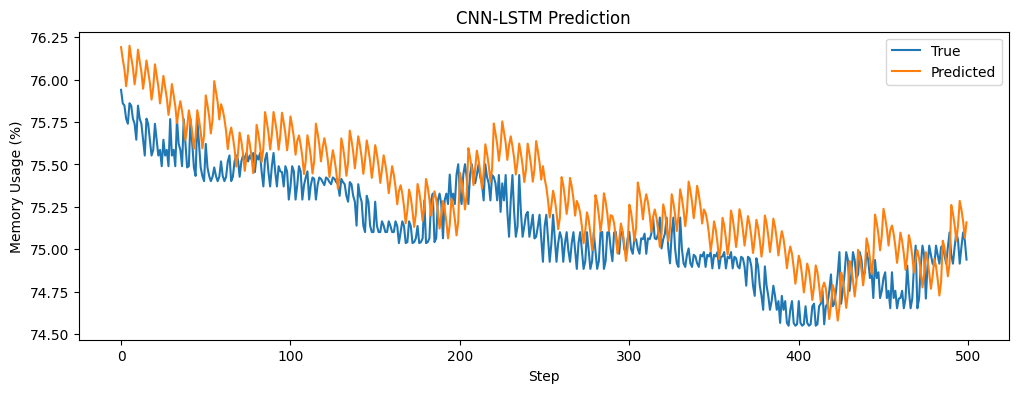

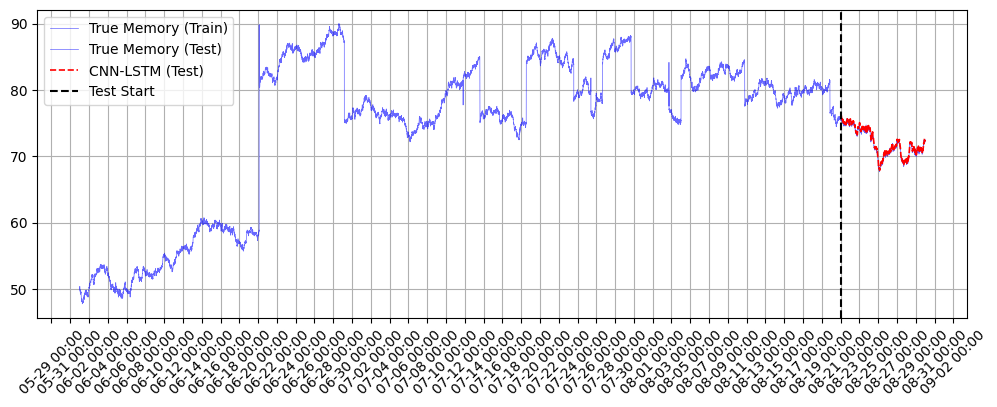

In [ ]:
# plot

print("CNN-LSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R¬≤  :", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}

plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:500], label="True")
plt.plot(pred_inv.flatten()[:500], label="Predicted")
plt.title("CNN-LSTM Prediction")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)
test_start_idx = val_end + past_steps
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
train_series = df['memory'][:test_start_idx]  # Test ÏãúÏûë Ï†ÑÍπåÏßÄ
val_series = df['memory'][train_end:val_end] # validation data
test_series_true= df['memory'][test_start_idx:]

all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp Îß§Ìïë
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # ÏÉòÌîå ÎÅùÎÇòÎäî ÏãúÏ†ê + (j+1)*5Î∂Ñ
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True Memory (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="CNN-LSTM (Test)", color="red", linestyle="--", linewidth = 1.2)
plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

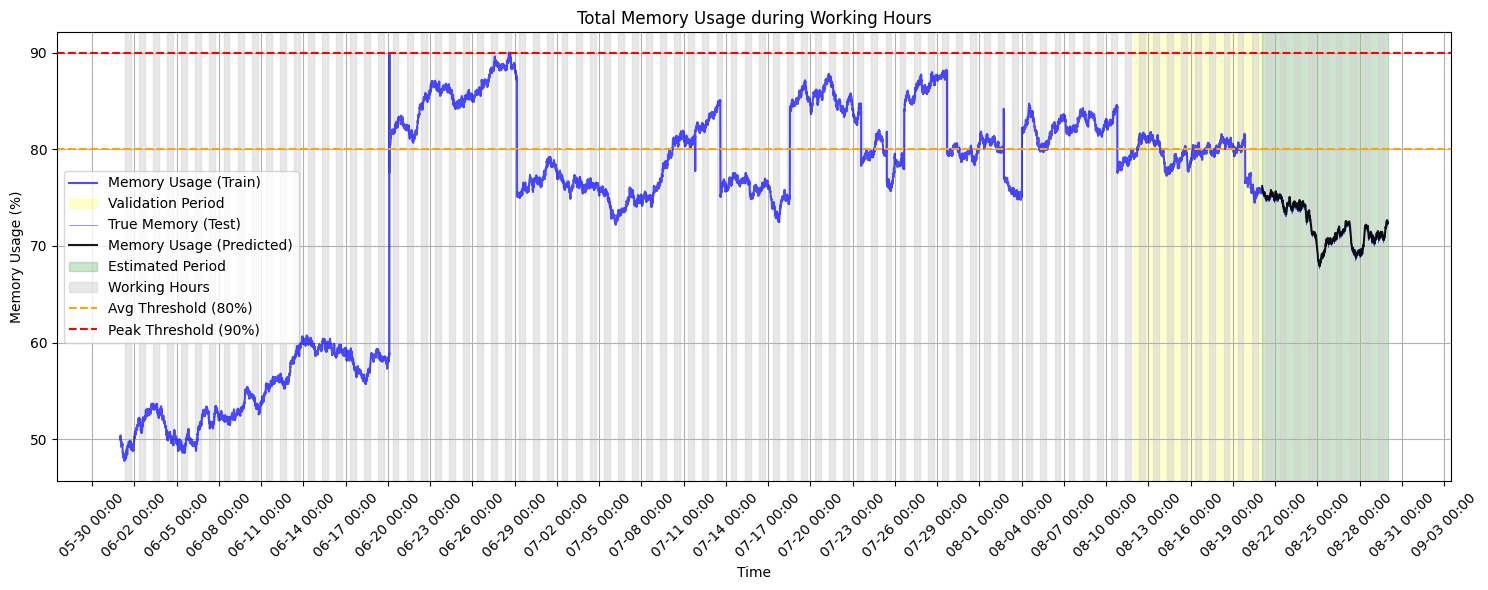

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from scipy.stats import linregress

# 1. Ï†ÑÏ≤¥ ÏòàÏ∏° ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ± (TrainÏùÄ Ïã§Ï†úÍ∞í, TestÎäî ÏòàÏ∏°Í∞í)
all_pred_series = pd.concat([
    df['memory'][:test_time_index[0]],       # Train Íµ¨Í∞ÑÏùÄ Ïã§Ï†ú Ï∏°Ï†ïÍ∞í
    test_series_pred                      # Test Íµ¨Í∞ÑÏùÄ ÏòàÏ∏°Í∞í
])
all_pred_series.name = "memory_pred"

# 2. ÏóÖÎ¨¥ÏãúÍ∞Ñ (08:00~18:00), ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Ï∂îÏ∂ú
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. Ï°∞Í±¥ 1: ÌèâÍ∑† memory ÏÇ¨Ïö©Î•† ‚â• 80% (ÏóÖÎ¨¥ÏãúÍ∞Ñ, ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Î∂ÑÎ¶¨)
avg_threshold = 80
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # ÏóÖÎ¨¥ÏãúÍ∞Ñ ÎòêÎäî ÎπÑÏóÖÎ¨¥ ÏãúÍ∞ÑÏóê average 80 % Ïù¥ÏÉÅÏù¥Î©¥ Ï¶ùÏÑ§ ÌïÑÏöî

# 4. Ï°∞Í±¥ 2: ÌîºÌÅ¨(‚â•90%) Î∞úÏÉùÌïú ÎÇ†Ïù¥ Ï†ÑÏ≤¥Ïùò 80% Ïù¥ÏÉÅ
peak_threshold = 90
daily_peak_flags = (all_pred_series > peak_threshold)
daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.8

# 5. Ï¶ùÏÑ§ ÌåêÎã®
upgrade_flag = condition1_flag or condition2_flag

# Î©îÎ™®Î¶¨ ÎàÑÏàò ÌåêÎã®
leak_days = []

memory_df = all_pred_series.to_frame(name='memory')
memory_df['date'] = memory_df.index.date
memory_df['hour'] = memory_df.index.hour

unique_dates = sorted(memory_df['date'].unique())

for date in unique_dates:
    nowork_mask = (
        ((memory_df['date'] == date) & (memory_df['hour'] >= 18)) |
        ((memory_df['date'] == pd.to_datetime(date) + pd.Timedelta(days=1)) & (memory_df['hour'] < 8))
    )
    nowork = memory_df[nowork_mask]

    if len(nowork) < 5:
        continue  # Îç∞Ïù¥ÌÑ∞ ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ skip

    # ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú Í∏∞Ïö∏Í∏∞ ÌôïÏù∏ ‚Üí ÏñëÏàòÎ©¥ Ï¶ùÍ∞Ä Ï∂îÏÑ∏
    slope, _, _, _, _ = linregress(range(len(nowork)), nowork['memory'].values)

    if slope > 0.01:  # Ï¶ùÍ∞Ä Ï∂îÏÑ∏ Í∞êÏßÄ
        leak_days.append(date)

is_memory_leak = len(leak_days) >= 1
print(f"Î©îÎ™®Î¶¨ ÎàÑÏàò ÌåêÎã®: {is_memory_leak} (Í∞êÏßÄÎêú ÏùºÏàò: {len(leak_days)})")

# 6. Upgrade ÌëúÏãúÌï† ÏãúÍ∞ÑÎåÄ ÏßÄÏ†ï
if condition1_flag:
    upgrade_times = work_time.index
elif condition2_flag:
    # Ï°∞Í±¥ 2 Ï∂©Ï°± Ïãú peak Î∞úÏÉùÏùº Í∏∞Ï§Ä
    peak_day_list = daily_peak[daily_peak].index[:5]  # ÏµúÎåÄ 5Ïùº
    upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
else:
    upgrade_times = []

# 7. ÏãúÍ∞ÅÌôî (TrainÍ≥º Test ÏÉâÏÉÅ Íµ¨Î∂Ñ)
fig, ax = plt.subplots(figsize=(15, 6))

# Train Íµ¨Í∞Ñ
train_series = df['memory'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="Memory Usage (Train)", color="blue", alpha=0.7)

# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test Íµ¨Í∞Ñ
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test Ï†ïÎãµÍ∞í
ax.plot(test_series_pred.index, test_series_pred.values, label="Memory Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# ÏóÖÎ¨¥ÏãúÍ∞Ñ Î∞∞Í≤Ω ÏÉâÏπ†
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # Ï≤´ Î≤àÏß∏ÏóêÎßå ÎùºÎ≤® Î∂ÄÏó¨
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# Í∏∞Ï§ÄÏÑ†
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (80%)")
ax.axhline(peak_threshold, color='red', linestyle='--', label="Peak Threshold (90%)")

# # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïã†Ìò∏ ÌëúÏãú
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# ÎßàÎ¨¥Î¶¨ ÏÑ§Ï†ï
ax.set_title("Total Memory Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("Memory Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit ÏúÑÌïú csv Ï†ÄÏû•
# ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï†ÄÏû•
memory_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
memory_avg_df.to_csv("memory_avg_usage_CNN-LSTM.csv", index=False)

import json
with open("memory_accuracy_metrics_CNN-LSTM.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_CNN-LSTM.csv") # Ï†ÑÏ≤¥ memory
test_series_pred.to_csv("memory_usage_predicted_only_CNN-LSTM.csv")
work_time.to_csv("memory_usage_working_hours_CNN-LSTM.csv")
daily_peak.to_csv("memory_peak_flag_per_day_CNN-LSTM.csv")

with open("upgrade_decision_CNN-LSTM.txt", "w") as f: # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïú†Î¨¥
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Memory Leak Detected: {is_memory_leak} (Days: {len(leak_days)})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("memory_plot_CNN-LSTM.png")


## 2. Îã®Ïàú CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# CNN-only Î™®Îç∏
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(future_steps)
])
model.compile(optimizer='adam', loss='mse')

# reshape for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train_cnn, y_train, epochs=20, batch_size=16, verbose=1)
pred = model.predict(X_test_cnn).reshape(-1, future_steps)
true = y_test.reshape(-1, future_steps)

pred_inv = scaler.inverse_transform(pred)
true_inv = scaler.inverse_transform(true)


Epoch 1/20
1215/1295 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0166

KeyboardInterrupt: 

CNN
MAE : 0.1465744877312432
RMSE: 0.18707748476172667
R¬≤  : 0.9575485399530969


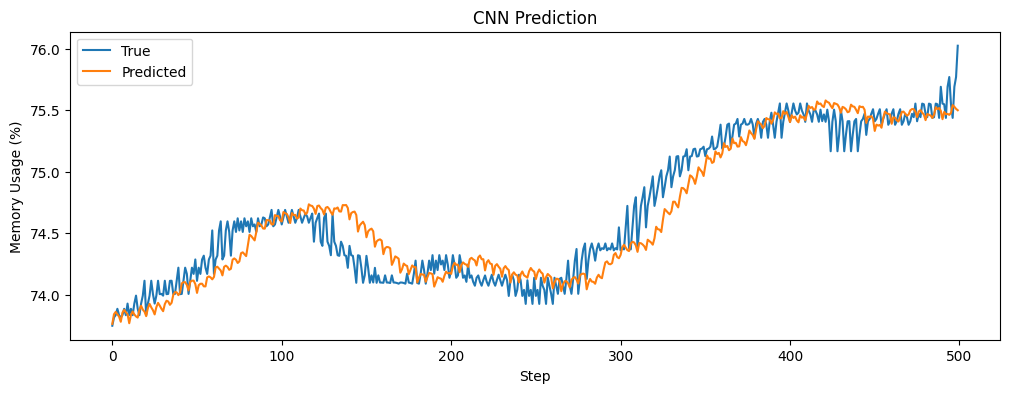

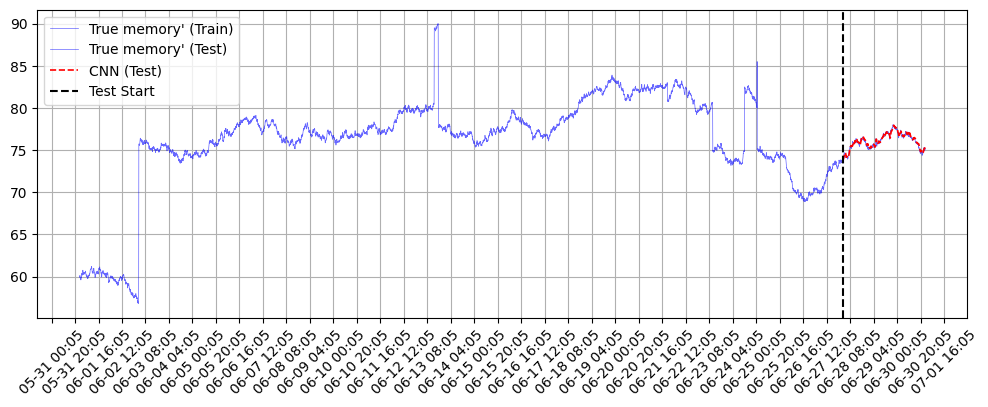

In [ ]:
# plot

print("CNN")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R¬≤  :", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}

plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:500], label="True")
plt.plot(pred_inv.flatten()[:500], label="Predicted")
plt.title("CNN Prediction")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)
test_start_idx = val_end + past_steps
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
train_series = df['memory'][:test_start_idx]  # Test ÏãúÏûë Ï†ÑÍπåÏßÄ
val_series = df['memory'][train_end:val_end] # validation data
test_series_true= df['memory'][test_start_idx:]

all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp Îß§Ìïë
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # ÏÉòÌîå ÎÅùÎÇòÎäî ÏãúÏ†ê + (j+1)*5Î∂Ñ
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True Memory (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)

# validation
plt.plot(val_series, label="Validation Memory (Val)", color="blue", alpha = 0.4, linewidth = 0.5)
# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="CNN (Test)", color="red", linestyle="--", linewidth = 1.2)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")


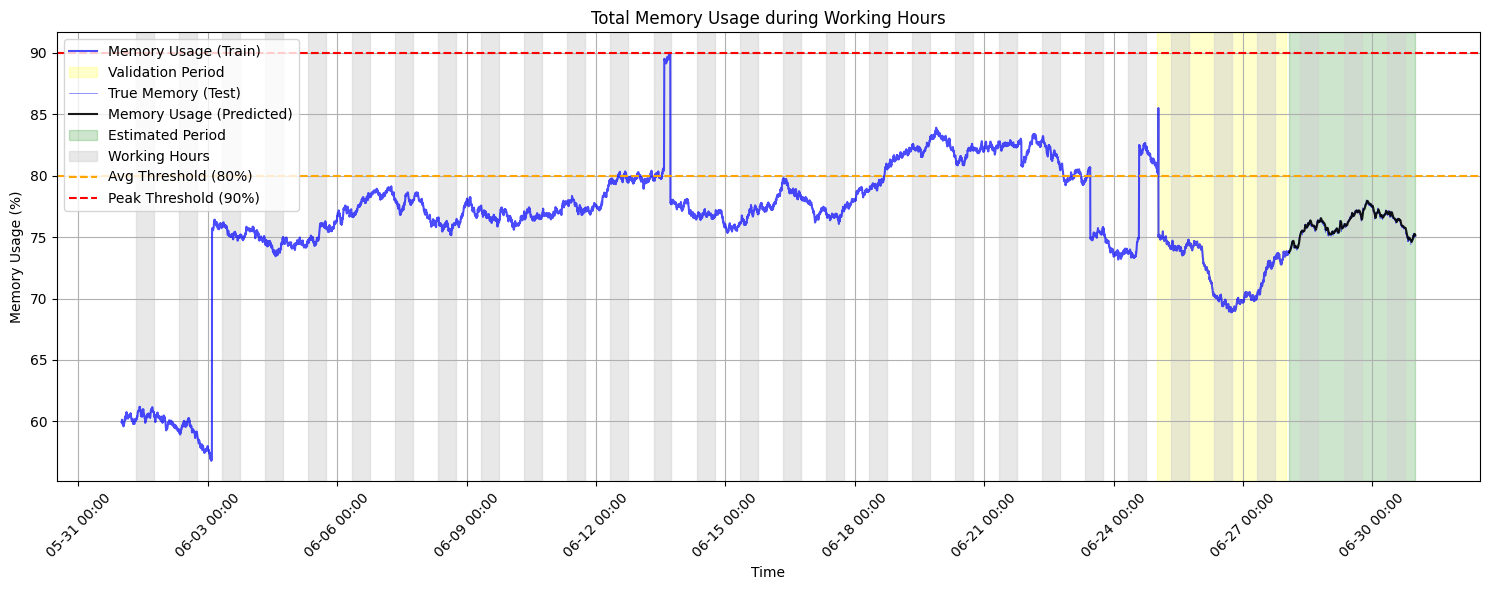

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Ï†ÑÏ≤¥ ÏòàÏ∏° ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ± (TrainÏùÄ Ïã§Ï†úÍ∞í, TestÎäî ÏòàÏ∏°Í∞í)
all_pred_series = pd.concat([
    df['memory'][:test_time_index[0]],       # Train Íµ¨Í∞ÑÏùÄ Ïã§Ï†ú Ï∏°Ï†ïÍ∞í
    test_series_pred                      # Test Íµ¨Í∞ÑÏùÄ ÏòàÏ∏°Í∞í
])
all_pred_series.name = "memory_pred"

# 2. ÏóÖÎ¨¥ÏãúÍ∞Ñ (08:00~18:00), ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Ï∂îÏ∂ú
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. Ï°∞Í±¥ 1: ÌèâÍ∑† memory ÏÇ¨Ïö©Î•† ‚â• 80% (ÏóÖÎ¨¥ÏãúÍ∞Ñ, ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Î∂ÑÎ¶¨)
avg_threshold = 80
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # ÏóÖÎ¨¥ÏãúÍ∞Ñ ÎòêÎäî ÎπÑÏóÖÎ¨¥ ÏãúÍ∞ÑÏóê average 80 % Ïù¥ÏÉÅÏù¥Î©¥ Ï¶ùÏÑ§ ÌïÑÏöî

# 4. Ï°∞Í±¥ 2: ÌîºÌÅ¨(‚â•90%) Î∞úÏÉùÌïú ÎÇ†Ïù¥ Ï†ÑÏ≤¥Ïùò 80% Ïù¥ÏÉÅ
peak_threshold = 90
daily_peak_flags = (all_pred_series > peak_threshold)
daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.8

# 5. Ï¶ùÏÑ§ ÌåêÎã®
upgrade_flag = condition1_flag or condition2_flag

# Î©îÎ™®Î¶¨ ÎàÑÏàò ÌåêÎã®
leak_days = []

memory_df = all_pred_series.to_frame(name='memory')
memory_df['date'] = memory_df.index.date
memory_df['hour'] = memory_df.index.hour

unique_dates = sorted(memory_df['date'].unique())

for date in unique_dates:
    nowork_mask = (
        ((memory_df['date'] == date) & (memory_df['hour'] >= 18)) |
        ((memory_df['date'] == pd.to_datetime(date) + pd.Timedelta(days=1)) & (memory_df['hour'] < 8))
    )
    nowork = memory_df[nowork_mask]

    if len(nowork) < 5:
        continue  # Îç∞Ïù¥ÌÑ∞ ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ skip

    # ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú Í∏∞Ïö∏Í∏∞ ÌôïÏù∏ ‚Üí ÏñëÏàòÎ©¥ Ï¶ùÍ∞Ä Ï∂îÏÑ∏
    slope, _, _, _, _ = linregress(range(len(nowork)), nowork['memory'].values)

    if slope > 0.01:  # Ï¶ùÍ∞Ä Ï∂îÏÑ∏ Í∞êÏßÄ
        leak_days.append(date)

is_memory_leak = len(leak_days) >= 1
print(f"Î©îÎ™®Î¶¨ ÎàÑÏàò ÌåêÎã®: {is_memory_leak} (Í∞êÏßÄÎêú ÏùºÏàò: {len(leak_days)})")


# # 6. Upgrade ÌëúÏãúÌï† ÏãúÍ∞ÑÎåÄ ÏßÄÏ†ï
# if condition1_flag:
#     upgrade_times = work_time.index
# elif condition2_flag:
#     # Ï°∞Í±¥ 2 Ï∂©Ï°± Ïãú peak Î∞úÏÉùÏùº Í∏∞Ï§Ä
#     peak_day_list = daily_peak[daily_peak].index[:5]  # ÏµúÎåÄ 5Ïùº
#     upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
# else:
#     upgrade_times = []

# 7. ÏãúÍ∞ÅÌôî (TrainÍ≥º Test ÏÉâÏÉÅ Íµ¨Î∂Ñ)
fig, ax = plt.subplots(figsize=(15, 6))

# Train Íµ¨Í∞Ñ
train_series = df['memory'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="Memory Usage (Train)", color="blue", alpha=0.7)

# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test Íµ¨Í∞Ñ
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test Ï†ïÎãµÍ∞í
ax.plot(test_series_pred.index, test_series_pred.values, label="Memory Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# ÏóÖÎ¨¥ÏãúÍ∞Ñ Î∞∞Í≤Ω ÏÉâÏπ†
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # Ï≤´ Î≤àÏß∏ÏóêÎßå ÎùºÎ≤® Î∂ÄÏó¨
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# Í∏∞Ï§ÄÏÑ†
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (80%)")
ax.axhline(peak_threshold, color='red', linestyle='--', label="Peak Threshold (90%)")

# # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïã†Ìò∏ ÌëúÏãú
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# ÎßàÎ¨¥Î¶¨ ÏÑ§Ï†ï
ax.set_title("Total Memory Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("Memory Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit ÏúÑÌïú csv Ï†ÄÏû•
# ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï†ÄÏû•
memory_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
memory_avg_df.to_csv("memory_avg_usage_CNN.csv", index=False)

import json
with open("memory_accuracy_metrics_CNN.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_CNN.csv") # Ï†ÑÏ≤¥ memory
test_series_pred.to_csv("memory_usage_predicted_only_CNN.csv")
work_time.to_csv("memory_usage_working_hours_CNN.csv")
daily_peak.to_csv("memory_peak_flag_per_day_CNN.csv")

with open("upgrade_decision_CNN.txt", "w") as f: # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïú†Î¨¥
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("memory_plot_CNN.png")


## CNN-BiLSTM + sliding window (5) + CNN 2Ï∏µ ÏåìÍ∏∞

In [ ]:
from tensorflow.keras.layers import Bidirectional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# reshape y to match CNN-BiLSTM output
y_train_re = y_train.reshape(-1, future_steps)
y_test_re  = y_test.reshape(-1, future_steps)

# ‚úÖ CNN-BiLSTM Î™®Îç∏ Íµ¨ÏÑ±
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, activation='tanh')),
    Dense(future_steps)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# ‚úÖ reshape for Conv1D & LSTM
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ‚úÖ ÌïôÏäµ
model.fit(X_train_cnn, y_train_re, epochs=20, batch_size=16, verbose=1)

# ‚úÖ ÏòàÏ∏°
pred = model.predict(X_test_cnn).reshape(-1, future_steps)
true = y_test_re.reshape(-1, future_steps)

# ‚úÖ Î≥µÏõê (Ï†ïÍ∑úÌôî ‚Üí ÏõêÎûò Îã®ÏúÑ [%]Î°ú)
pred_inv = scaler.inverse_transform(pred)
true_inv = scaler.inverse_transform(true)

# ‚úÖ ÏÑ±Îä• Ï∂úÎ†•
print("CNN-BiLSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R¬≤  :", r2_score(true_inv, pred_inv))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d_2 (Conv1D)               ‚îÇ (None, 18, 64)         ‚îÇ           256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_2 (MaxPooling1D)  ‚îÇ (None, 9, 64)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)   ‚îÇ (None, 128)            ‚îÇ        66,048 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 5)              ‚îÇ           645 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 66,949 (261.52 KB)

 Trainable params: 66,949 (261.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - loss: 0.0280
Epoch 2/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - loss: 6.4808e-04
Epoch 3/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 7.7699e-04
Epoch 4/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 6ms/step - loss: 5.4956e-04
Epoch 5/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 6ms/step - loss: 6.4483e-04
Epoch 6/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 3.5771e-04
Epoch 7/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - loss: 3.6222e-04
Epoch 8/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - loss: 2.5397e-04
Epoch 9/20
431/431 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - loss: 4.8263e-04
Epoch

CNN-BiLSTM
MAE : 0.2306473860744897
RMSE: 0.4232804044999631
R¬≤  : 0.8451819465035728


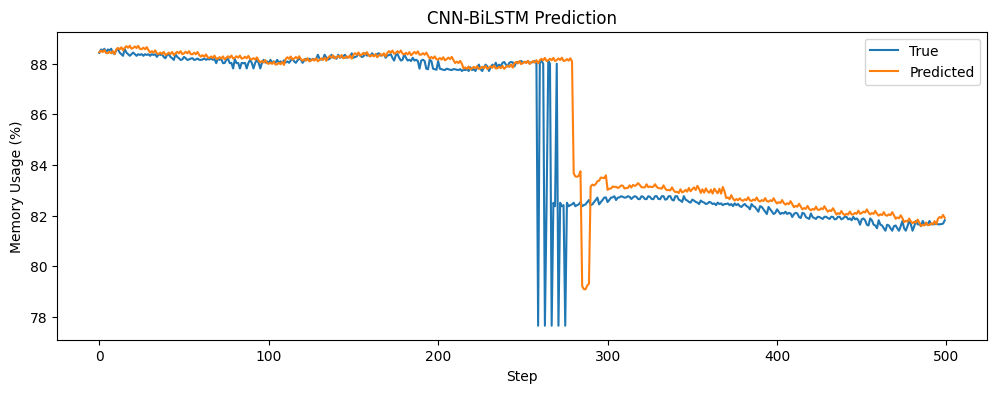

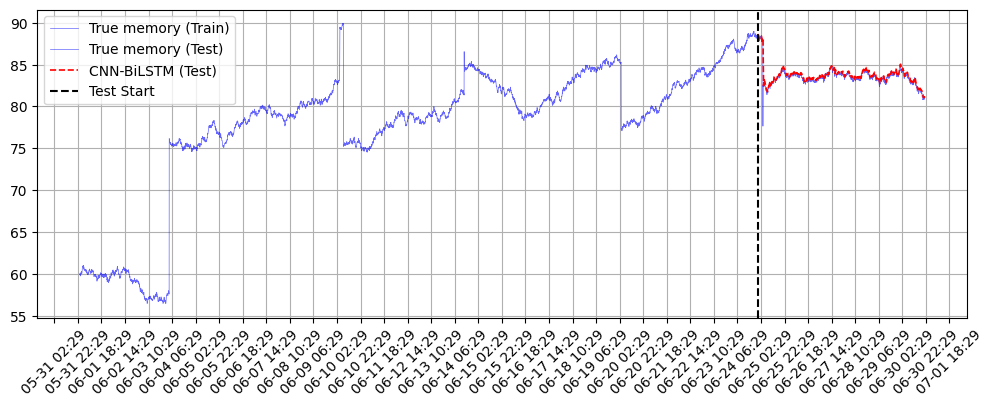

In [ ]:
# plot

print("CNN-BiLSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R¬≤  :", r2_score(true_inv, pred_inv))
metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}


plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:500], label="True")
plt.plot(pred_inv.flatten()[:500], label="Predicted")
plt.title("CNN-BiLSTM Prediction")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)

test_start_idx = val_end + past_steps
train_series = df['memory'][:test_start_idx]  # Test ÏãúÏûë Ï†ÑÍπåÏßÄ
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
val_series = df['memory'][train_end:val_end] # validation data
test_series_true= df['memory'][test_start_idx:]

all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp Îß§Ìïë
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # ÏÉòÌîå ÎÅùÎÇòÎäî ÏãúÏ†ê + (j+1)*5Î∂Ñ
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True Memory (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)

# validation
plt.plot(val_series, label="Validation Memory (Val)", color="blue", alpha = 0.4, linewidth = 0.5)
# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="Bi-LSTM (Test)", color="red", linestyle="--", linewidth = 1.2)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Ï†ÑÏ≤¥ ÏòàÏ∏° ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ± (TrainÏùÄ Ïã§Ï†úÍ∞í, TestÎäî ÏòàÏ∏°Í∞í)
all_pred_series = pd.concat([
    df['memory'][:test_time_index[0]],       # Train Íµ¨Í∞ÑÏùÄ Ïã§Ï†ú Ï∏°Ï†ïÍ∞í
    test_series_pred                      # Test Íµ¨Í∞ÑÏùÄ ÏòàÏ∏°Í∞í
])
all_pred_series.name = "memory_pred"

# 2. ÏóÖÎ¨¥ÏãúÍ∞Ñ (08:00~18:00), ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Ï∂îÏ∂ú
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. Ï°∞Í±¥ 1: ÌèâÍ∑† memory ÏÇ¨Ïö©Î•† ‚â• 80% (ÏóÖÎ¨¥ÏãúÍ∞Ñ, ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ Î∂ÑÎ¶¨)
avg_threshold = 80
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # ÏóÖÎ¨¥ÏãúÍ∞Ñ ÎòêÎäî ÎπÑÏóÖÎ¨¥ ÏãúÍ∞ÑÏóê average 80 % Ïù¥ÏÉÅÏù¥Î©¥ Ï¶ùÏÑ§ ÌïÑÏöî

# 4. Ï°∞Í±¥ 2: ÌîºÌÅ¨(‚â•90%) Î∞úÏÉùÌïú ÎÇ†Ïù¥ Ï†ÑÏ≤¥Ïùò 80% Ïù¥ÏÉÅ
peak_threshold = 90
daily_peak_flags = (all_pred_series > peak_threshold)
daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.8

# 5. Ï¶ùÏÑ§ ÌåêÎã®
upgrade_flag = condition1_flag or condition2_flag

# Î©îÎ™®Î¶¨ ÎàÑÏàò ÌåêÎã®
leak_days = []

memory_df = all_pred_series.to_frame(name='memory')
memory_df['date'] = memory_df.index.date
memory_df['hour'] = memory_df.index.hour

unique_dates = sorted(memory_df['date'].unique())

for date in unique_dates:
    nowork_mask = (
        ((memory_df['date'] == date) & (memory_df['hour'] >= 18)) |
        ((memory_df['date'] == pd.to_datetime(date) + pd.Timedelta(days=1)) & (memory_df['hour'] < 8))
    )
    nowork = memory_df[nowork_mask]

    if len(nowork) < 5:
        continue  # Îç∞Ïù¥ÌÑ∞ ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ skip

    # ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú Í∏∞Ïö∏Í∏∞ ÌôïÏù∏ ‚Üí ÏñëÏàòÎ©¥ Ï¶ùÍ∞Ä Ï∂îÏÑ∏
    slope, _, _, _, _ = linregress(range(len(nowork)), nowork['memory'].values)

    if slope > 0.01:  # Ï¶ùÍ∞Ä Ï∂îÏÑ∏ Í∞êÏßÄ
        leak_days.append(date)

is_memory_leak = len(leak_days) >= 1
print(f"Î©îÎ™®Î¶¨ ÎàÑÏàò ÌåêÎã®: {is_memory_leak} (Í∞êÏßÄÎêú ÏùºÏàò: {len(leak_days)})")

# 6. Upgrade ÌëúÏãúÌï† ÏãúÍ∞ÑÎåÄ ÏßÄÏ†ï
if condition1_flag:
    upgrade_times = work_time.index
elif condition2_flag:
    # Ï°∞Í±¥ 2 Ï∂©Ï°± Ïãú peak Î∞úÏÉùÏùº Í∏∞Ï§Ä
    peak_day_list = daily_peak[daily_peak].index[:5]  # ÏµúÎåÄ 5Ïùº
    upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
else:
    upgrade_times = []

# 7. ÏãúÍ∞ÅÌôî (TrainÍ≥º Test ÏÉâÏÉÅ Íµ¨Î∂Ñ)
fig, ax = plt.subplots(figsize=(15, 6))

# Train Íµ¨Í∞Ñ
train_series = df['memory'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="Memory Usage (Train)", color="blue", alpha=0.7)

# Validation Íµ¨Í∞ÑÏóê ÏÉâÏÉÅ ÏûÖÌûàÍ∏∞
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test Íµ¨Í∞Ñ
plt.plot(test_series_true, label="True Memory (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test Ï†ïÎãµÍ∞í
ax.plot(test_series_pred.index, test_series_pred.values, label="Memory Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# ÏóÖÎ¨¥ÏãúÍ∞Ñ Î∞∞Í≤Ω ÏÉâÏπ†
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # Ï≤´ Î≤àÏß∏ÏóêÎßå ÎùºÎ≤® Î∂ÄÏó¨
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# Í∏∞Ï§ÄÏÑ†
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (80%)")
ax.axhline(peak_threshold, color='red', linestyle='--', label="Peak Threshold (90%)")

# # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïã†Ìò∏ ÌëúÏãú
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# ÎßàÎ¨¥Î¶¨ ÏÑ§Ï†ï
ax.set_title("Total Memory Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("Memory Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit ÏúÑÌïú csv Ï†ÄÏû•
# ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï†ÄÏû•
memory_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
memory_avg_df.to_csv("memory_avg_usage_Bi-LSTM.csv", index=False)

import json
with open("memory_accuracy_metrics_Bi-LSTM.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_Bi-LSTM.csv") # Ï†ÑÏ≤¥ memory
test_series_pred.to_csv("memory_usage_predicted_only_Bi-LSTM.csv")
work_time.to_csv("memory_usage_working_hours_Bi-LSTM.csv")
daily_peak.to_csv("memory_peak_flag_per_day_Bi-LSTM.csv")

with open("upgrade_decision_Bi-LSTM.txt", "w") as f: # ÏóÖÍ∑∏Î†àÏù¥Îìú Ïú†Î¨¥
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("memory_plot_Bi-LSTM.png")


## app.py ÏóêÏÑú memory Ìï®ÏàòÎßå

In [ ]:
def show_memory_analysis():
# Ïù¥ÏÉÅÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞

        st.markdown("#### 1. Ïù¥ÏÉÅÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞")

        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN-LSTM ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("memory/Memory_all_series_CNN-LSTM.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("memory/Memory_usage_predicted_only_CNN-LSTM.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("memory/Memory_usage_working_hours_CNN-LSTM.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("memory/Memory_peak_flag_per_day_CNN-LSTM.csv", index_col=0, parse_dates=True)

            avg_threshold = 75

            # Ï†ïÌôïÎèÑ
            with open("memory/Memory_accuracy_metrics_CNN-LSTM.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("memory/Memory_avg_usage_CNN-LSTM.csv")

            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_memory_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_memory_ideal >= avg_threshold

            series = pd.read_csv(
                "memory/Memory_all_series_CNN-LSTM.csv",
                index_col=0, parse_dates=True
            )['memory_usage']

            mu = float(series.mean())
            sigma = float(series.std())
            rel_threshold = mu + 2 * sigma

            daily_peak_flags = series > rel_threshold
            daily_peak = daily_peak_flags.groupby(series.index.date).any()
            peak_days = int(daily_peak.sum())
            total_days = int(len(daily_peak))
            condition2_flag = (peak_days / total_days) >= 0.06  # CÎì±Í∏â 6%

            upgrade_ideal = condition1_ideal or condition2_flag

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† Memory ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Memory ÎàÑÏÑ§ ÌåêÎã®")
            try:
                from scipy.stats import linregress
                _HAS_SCIPY = True
            except Exception:
                _HAS_SCIPY = False

            def detect_memory_leak_segmented(memory_df: pd.DataFrame,
                                            work_start="08:00",
                                            work_end="18:00",
                                            slope_threshold=0.0,
                                            min_points=5):
                """ÎπÑÏóÖÎ¨¥ ÏãúÍ∞Ñ(18~ÏùµÏùº 08Ïãú) Íµ¨Í∞ÑÎ≥Ñ ÏÑ†Ìòï ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞Í∞Ä ÏñëÏàòÎ©¥ ÎàÑÏàòÎ°ú Í∞ÑÏ£º"""
                df = memory_df.copy()
                df.index = pd.to_datetime(df.index)
                df = df.sort_index()

                unique_days = pd.Index(sorted(pd.to_datetime(df.index.date).unique()))
                rows, leak_days = [], []

                ws_h = int(work_start.split(":")[0])  # 8
                we_h = int(work_end.split(":")[0])    # 18

                for d in unique_days[:-1]:  # ÎßàÏßÄÎßâ ÎÇ†ÏùÄ Îã§ÏùåÎÇ† 08:00Ïù¥ ÏóÜÏùÑ Ïàò ÏûàÏùå
                    start = pd.Timestamp(d) + pd.Timedelta(hours=we_h)                  # d 18:00
                    end   = pd.Timestamp(d) + pd.Timedelta(days=1) + pd.Timedelta(hours=ws_h)  # d+1 08:00

                    seg = df.loc[(df.index >= start) & (df.index < end), "memory"]
                    if len(seg) < min_points:
                        continue

                    x = (seg.index - seg.index[0]).total_seconds() / 3600.0  # ÏãúÍ∞Ñ Îã®ÏúÑ
                    y = seg.values.astype(float)

                    if _HAS_SCIPY:
                        slope, intercept, r, p, stderr = linregress(x, y)
                    else:
                        # SciPy ÏóÜÎäî ÌôòÍ≤Ω fallback
                        slope = np.polyfit(x, y, 1)[0]
                        r = np.corrcoef(x, y)[0, 1] if len(x) > 1 else np.nan
                        p = np.nan
                        stderr = np.nan

                    is_leak = slope > slope_threshold
                    rows.append({
                        "date": d,
                        "start": start,
                        "end": end,
                        "slope(%/h)": slope,
                        "r": r,
                        "p": p,
                        "is_leak": is_leak
                    })
                    if is_leak:
                        leak_days.append(d)

                detail = pd.DataFrame(rows)
                return {"is_memory_leak": len(leak_days) > 0, "leak_days": leak_days, "detail": detail}

            # --- Ïã§Ìñâ: ÏúÑÏóêÏÑú ÎßåÎì† series ÏÇ¨Ïö© ---
            memory_df_for_leak = series.to_frame(name="memory")   # series: Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ (index=datetime, column='memory_usage')
            memory_df_for_leak.rename(columns={"memory_usage": "memory"}, inplace=True)

            leak_res = detect_memory_leak_segmented(
                memory_df_for_leak,
                work_start="08:00",
                work_end="18:00",
                slope_threshold=0.0,  # ÌïÑÏöîÏãú ÏñëÏàò Ï°∞Í∏à(Ïòà: 0.01)Î°ú Ï°∞Ï†ï
                min_points=5
            )

            is_leak = leak_res["is_memory_leak"]
            leak_days = leak_res["leak_days"]
            detail = leak_res["detail"]

            st.markdown(f"- **Î©îÎ™®Î¶¨ ÎàÑÏàò Í∞êÏßÄ Ïó¨Î∂Ä**: `{is_leak}` (Í∞êÏßÄ ÏùºÏàò: **{len(leak_days)}**)")

            if not detail.empty:
                # Î≥¥Í∏∞ Ï¢ãÍ≤å Ìè¨Îß∑
                detail_show = detail.copy()
                detail_show["date"] = detail_show["date"].astype(str)
                detail_show = detail_show[["date", "start", "end", "slope(%/h)", "r", "p", "is_leak"]]
                st.dataframe(
                    detail_show.style.format({
                        "slope(%/h)": "{:.3f}",
                        "r": "{:.3f}",
                        "p": "{:.3f}"
                    }),
                    use_container_width=True
                )

            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : CÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 75%): <code>{condition1_ideal}</code> ({avg_memory_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 6%): <code>{condition2_flag}</code> ({int(peak_days)}/{total_days})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("memory/Memory_plot_CNN-LSTM.png") # fig ÌååÏùº


        # CNN
        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_CNN.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN.csv", index_col=0, parse_dates=True)

            avg_threshold = 80
            peak_threshold = 90

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_CNN.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("cpu/cpu_plot_CNN.png") # fig ÌååÏùº

        ## Bi-LSTM
        with st.expander("ÌïôÏäµÎ™®Îç∏ : Bi-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : Bi-LSTM ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_Bi-LSTM.csv", index_col=0, parse_dates=True)

            avg_threshold = 80
            peak_threshold = 90

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = df_work_ideal.values.mean()
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_Bi-LSTM.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("cpu/cpu_plot_Bi-LSTM.png") # fig ÌååÏùº


        # 2. ÎÖ∏Ïù¥Ï¶à ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞

        # --- ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ ---
        df_all = pd.read_csv("cpu/all_series_CNN-LSTM2.csv", index_col=0, parse_dates=True)
        df_pred = pd.read_csv("cpu/cpu_usage_predicted_only_CNN-LSTM2.csv", index_col=0, parse_dates=True)
        df_work = pd.read_csv("cpu/cpu_usage_working_hours_CNN-LSTM2.csv", index_col=0, parse_dates=True)
        df_peak = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN-LSTM2.csv", index_col=0, parse_dates=True)


        # --- Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞ ---
        avg_threshold = 80
        peak_threshold = 90

        avg_cpu = df_work.values.mean()
        condition1_flag = avg_cpu >= avg_threshold

        peak_days = df_peak.values.sum()
        total_days = len(df_peak)
        condition2_flag = (peak_days / total_days) >= 0.8

        upgrade_flag = condition1_flag or condition2_flag

        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

        # Ï†ïÌôïÎèÑ Î∂àÎü¨Ïò§Í∏∞
        with open("cpu/cpu_accuracy_metrics_CNN-LSTM2.json", "r") as f:
            metrics = json.load(f)

        # --- ÏóÖÍ∑∏Î†àÏù¥Îìú ÌëúÏãú ÏãúÍ∞Ñ Ï∂îÏ∂ú ---
        if condition1_flag:
            upgrade_times = df_work.index
        elif condition2_flag:
            peak_day_list = df_peak[df_peak.values.flatten()].index[:5]
            upgrade_times = df_work[df_work.index.date.astype(str).isin(peak_day_list.astype(str))].index
        else:
            upgrade_times = []

        # --- Streamlit Ï∂úÎ†• ---

        st.markdown("#### 2. ÎÖ∏Ïù¥Ï¶à ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞")
        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN-LSTM"):
          st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN-LSTM")

          # ÌëúÏãú
          df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN-LSTM2.csv")
          avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
          avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

          # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
          avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
          condition1_ideal = avg_cpu_ideal >= avg_threshold

          peak_days_ideal = df_peak_ideal.values.sum()
          total_days_ideal = len(df_peak_ideal)
          condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

          upgrade_ideal = condition1_ideal or condition2_ideal

          st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
          st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
          st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
          focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
          focus_value = max(avg_work, avg_nowork)
          st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

          st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
          st.markdown(f"- **MAE**: {metrics['MAE']}")
          st.markdown(f"- **RMSE**: {metrics['RMSE']}")
          st.markdown(f"- **R¬≤ Score**: {metrics['R2']}")

          st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
          st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
          st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† CPU ÏÇ¨Ïö©Îüâ ‚â• 70%): <code>{condition1_flag}</code> ({avg_cpu:.2f}%)</p>", unsafe_allow_html=True)
          st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú®): <code>{condition2_flag}</code> ({int(peak_days)}/{total_days})</p>", unsafe_allow_html=True)

          # Í≤∞Í≥º Í∞ïÏ°∞
          result_text = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_flag else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
          st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text}</h3>", unsafe_allow_html=True)
          st.image("cpu/cpu_plot_CNN-LSTM2.png") # fig ÌååÏùº

        # CNN
        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN"):
          st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN")

          # --- ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ ---
          df_all = pd.read_csv("cpu/all_series_CNN2.csv", index_col=0, parse_dates=True)
          df_pred = pd.read_csv("cpu/cpu_usage_predicted_only_CNN2.csv", index_col=0, parse_dates=True)
          df_work = pd.read_csv("cpu/cpu_usage_working_hours_CNN2.csv", index_col=0, parse_dates=True)
          df_peak = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN2.csv", index_col=0, parse_dates=True)

          from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

          # Ï†ïÌôïÎèÑ Î∂àÎü¨Ïò§Í∏∞
          with open("cpu/cpu_accuracy_metrics_CNN2.json", "r") as f:
              metrics = json.load(f)

          # ÌëúÏãú
          df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN2.csv")
          avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
          avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

          # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
          avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
          condition1_ideal = avg_cpu_ideal >= avg_threshold

          peak_days_ideal = df_peak_ideal.values.sum()
          total_days_ideal = len(df_peak_ideal)
          condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

          upgrade_ideal = condition1_ideal or condition2_ideal

          st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
          st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
          st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
          focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
          focus_value = max(avg_work, avg_nowork)
          st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

          st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
          st.markdown(f"- **MAE**: {metrics['MAE']}")
          st.markdown(f"- **RMSE**: {metrics['RMSE']}")
          st.markdown(f"- **R¬≤ Score**: {metrics['R2']}")

          st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
          st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
          st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† CPU ÏÇ¨Ïö©Îüâ ‚â• 70%): <code>{condition1_flag}</code> ({avg_cpu:.2f}%)</p>", unsafe_allow_html=True)
          st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú®): <code>{condition2_flag}</code> ({int(peak_days)}/{total_days})</p>", unsafe_allow_html=True)

          # Í≤∞Í≥º Í∞ïÏ°∞
          result_text = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_flag else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
          st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text}</h3>", unsafe_allow_html=True)

          st.image("cpu/cpu_plot_CNN2.png") # fig ÌååÏùº


        # Bi-LSTM
        with st.expander("ÌïôÏäµÎ™®Îç∏ : Bi-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : Bi-LSTM")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM2.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM2.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM2.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_Bi-LSTM2.csv", index_col=0, parse_dates=True)

            avg_threshold = 80
            peak_threshold = 90

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = df_work_ideal.values.mean()
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_Bi-LSTM2.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM2.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            mu = all_pred_series.mean()
            sigma = all_pred_series.std()
            rel_threshold = mu + 2 * sigma           # ÌèâÍ∑† + 2œÉ

            daily_peak_flags = all_pred_series > rel_threshold

            daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
            peak_days = daily_peak.sum()
            total_days = len(daily_peak)
            condition2_flag = (peak_days / total_days) >= 0.06   # cÎì±Í∏â ÌîºÌÅ¨ ÎπÑÏú® 6%

            upgrade_ideal = condition1_ideal or condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("cpu/cpu_plot_Bi-LSTM2.png") # fig ÌååÏùº

      # 3. Ï¶ùÏÑ§ ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞

        st.markdown("#### 3. Ï¶ùÏÑ§ ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞")

        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN-LSTM ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_CNN-LSTM3.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN-LSTM3.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN-LSTM3.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN-LSTM3.csv", index_col=0, parse_dates=True)

            avg_threshold = 80
            peak_threshold = 90

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_CNN-LSTM3.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN-LSTM3.csv")

            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("cpu/cpu_plot_CNN-LSTM3.png") # fig ÌååÏùº

        # CNN
        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_CNN3.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN3.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN3.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN3.csv", index_col=0, parse_dates=True)

            avg_threshold = 80
            peak_threshold = 90

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_CNN3.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN3.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)
            st.image("cpu/cpu_plot_CNN3.png") # fig ÌååÏùº

        ## Bi-LSTM
        with st.expander("ÌïôÏäµÎ™®Îç∏ : Bi-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : Bi-LSTM ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM3.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM3.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM3.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_Bi-LSTM3.csv", index_col=0, parse_dates=True)

            avg_threshold = 80
            peak_threshold = 90

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = df_work_ideal.values.mean()
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_Bi-LSTM3.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM3.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : AÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("cpu/cpu_plot_Bi-LSTM3.png") # fig ÌååÏùº

      # 4. Ï∂ïÏÜå ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞

        st.markdown("#### 4. Ï¶ùÏÑ§ ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞")

        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN-LSTM ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_CNN-LSTM4.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN-LSTM4.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN-LSTM4.csv", index_col=0, parse_dates=True)

            avg_threshold = 30
            std_threshold = 5  # CÎì±Í∏â Í∏∞Ï§Ä: ÌëúÏ§ÄÌé∏Ï∞® 5% Ïù¥Ìïò

            # ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï°∞Í±¥
            avg_cpu_ideal = max(avg_work, avg_nowork)
            condition1_ideal = avg_cpu_ideal <= avg_threshold

            # ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
            std_cpu_ideal = df_all_ideal['cpu'].std()
            condition2_ideal = std_cpu_ideal <= std_threshold

            # Ï∂ïÏÜå ÌåêÎã®
            shrink_ideal = condition1_ideal and condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï∂ïÏÜå ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : CÎì±Í∏â")

            # Ï°∞Í±¥ 1: ÌèâÍ∑† ÏÇ¨Ïö©Î•†
            st.markdown(
                f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â§ 30%): "
                f"<code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True
            )

            # Ï°∞Í±¥ 2: ÌëúÏ§ÄÌé∏Ï∞®
            st.markdown(
                f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÌëúÏ§ÄÌé∏Ï∞® ‚â§ 5%): "
                f"<code>{condition2_ideal}</code> ({std_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True
            )

            # ÏµúÏ¢Ö ÌåêÎã® Ï∂úÎ†•
            result_text_ideal = 'üü© <b>Ï∂ïÏÜå Í∂åÍ≥†</b>' if shrink_ideal else 'üü• <b>Ï∂ïÏÜå Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h4>", unsafe_allow_html=True)


            st.image("cpu/cpu_plot_CNN-LSTM4.png") # fig ÌååÏùº

        # CNN
        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_CNN4.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN4.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN4.csv", index_col=0, parse_dates=True)

            avg_threshold = 30  # ÌèâÍ∑† ÏÇ¨Ïö©Î•† Í∏∞Ï§Ä (CÎì±Í∏â)
            std_threshold = 5   # ÌëúÏ§ÄÌé∏Ï∞® Í∏∞Ï§Ä (CÎì±Í∏â)

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_CNN4.json", "r") as f:
                metrics_ideal = json.load(f)

            # ÌèâÍ∑† ÏÇ¨Ïö©Î•† Í≥ÑÏÇ∞
            df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN4.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]
            avg_cpu_ideal = max(avg_work, avg_nowork)
            condition1_ideal = avg_cpu_ideal <= avg_threshold

            # ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
            std_cpu_ideal = df_all_ideal['cpu'].std()
            condition2_ideal = std_cpu_ideal <= std_threshold

            # Ï∂ïÏÜå ÏµúÏ¢Ö ÌåêÎã®
            shrink_ideal = condition1_ideal and condition2_ideal

            # UI Ï∂úÎ†•
            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï∂ïÏÜå ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : CÎì±Í∏â")

            st.markdown(
                f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â§ 30%): "
                f"<code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

            st.markdown(
                f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÌëúÏ§ÄÌé∏Ï∞® ‚â§ 5%): "
                f"<code>{condition2_ideal}</code> ({std_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü© <b>Ï∂ïÏÜå Í∂åÍ≥†</b>' if shrink_ideal else 'üü• <b>Ï∂ïÏÜå Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h4>", unsafe_allow_html=True)

            st.image("cpu/cpu_plot_CNN4.png")  # ÏãúÍ∞ÅÌôî


        ## Bi-LSTM
        with st.expander("ÌïôÏäµÎ™®Îç∏ : Bi-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : Bi-LSTM ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM4.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM4.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM4.csv", index_col=0, parse_dates=True)

            avg_threshold = 30  # ÌèâÍ∑† ÏÇ¨Ïö©Î•† Ï∂ïÏÜå Í∏∞Ï§Ä (CÎì±Í∏â)
            std_threshold = 5   # ÌëúÏ§ÄÌé∏Ï∞® Ï∂ïÏÜå Í∏∞Ï§Ä (CÎì±Í∏â)

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_Bi-LSTM3.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM4.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work, avg_nowork)
            condition1_ideal = avg_cpu_ideal <= avg_threshold

            std_cpu_ideal = df_all_ideal['cpu'].std()
            condition2_ideal = std_cpu_ideal <= std_threshold

            shrink_ideal = condition1_ideal and condition2_ideal

            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")

            st.markdown("#### üîç Ï∂ïÏÜå ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : CÎì±Í∏â")

            st.markdown(
                f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â§ 30%): "
                f"<code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

            st.markdown(
                f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÌëúÏ§ÄÌé∏Ï∞® ‚â§ 5%): "
                f"<code>{condition2_ideal}</code> ({std_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü© <b>Ï∂ïÏÜå Í∂åÍ≥†</b>' if shrink_ideal else 'üü• <b>Ï∂ïÏÜå Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h4>", unsafe_allow_html=True)

            st.image("cpu/cpu_plot_Bi-LSTM4.png")  # fig ÌååÏùº


      # pdf ÏÉùÏÑ±
        from fpdf import FPDF

        st.markdown("---")
        st.markdown("### üìù PDF Î≥¥Í≥†ÏÑú ÎßåÎì§Í∏∞")

        # --- Ï≤¥ÌÅ¨Î∞ïÏä§ ÏÑ†ÌÉù
        include_accuracy = st.checkbox("Î™®Îç∏Î≥Ñ ÏòàÏ∏° Ï†ïÌôïÎèÑ Ìè¨Ìï®", value=True)
        include_conditions = st.checkbox("Ï¶ùÏÑ§ Î∞è Ï∂ïÏÜå Ï°∞Í±¥ ÌåêÎã® Ìè¨Ìï®", value=True)
        include_chart = st.checkbox("CPU ÏÇ¨Ïö©Îüâ Í∑∏ÎûòÌîÑ Ìè¨Ìï®", value=True)






                # CNN
        with st.expander("ÌïôÏäµÎ™®Îç∏ : CNN"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : CNN ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("memory/Memory_all_series_CNN.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("memory/Memory_usage_predicted_only_CNN.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("memory/Memory_usage_working_hours_CNN.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("memory/Memory_peak_flag_per_day_CNN.csv", index_col=0, parse_dates=True)

            avg_threshold = 75

            # Ï†ïÌôïÎèÑ
            with open("memory/Memory_accuracy_metrics_CNN.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("memory/Memory_avg_usage_CNN.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_memory_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_memory_ideal >= avg_threshold

            series = pd.read_csv(
                "memory/Memory_all_series_CNN.csv",
                index_col=0, parse_dates=True
            )['memory_usage']

            mu = float(series.mean())
            sigma = float(series.std())
            rel_threshold = mu + 2 * sigma

            daily_peak_flags = series > rel_threshold
            daily_peak = daily_peak_flags.groupby(series.index.date).any()
            peak_days = int(daily_peak.sum())
            total_days = int(len(daily_peak))
            condition2_flag = (peak_days / total_days) >= 0.07  # CÎì±Í∏â 7%

            upgrade_ideal = condition1_ideal or condition2_flag


            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")


            st.markdown("#### üîç Memory ÎàÑÏÑ§ ÌåêÎã®")
            try:
                from scipy.stats import linregress
                _HAS_SCIPY = True
            except Exception:
                _HAS_SCIPY = False

            def detect_memory_leak_segmented(memory_df: pd.DataFrame,
                                            work_start="08:00",
                                            work_end="18:00",
                                            slope_threshold=0.05,      # ‚Üê Í∏∞Ï§Ä Í∏∞Ïö∏Í∏∞( %/h )
                                            min_points=5,
                                            required_fraction=0.7):    # ‚Üê Ï†ÑÏ≤¥ ÏïºÍ∞Ñ Ï§ë ÎßåÏ°± ÎπÑÏú®
                """ÎπÑÏóÖÎ¨¥ ÏãúÍ∞Ñ(18~ÏùµÏùº 08Ïãú)ÎßàÎã§ ÏÑ†ÌòïÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞ÌïòÍ≥†,
                  Í∏∞Ïö∏Í∏∞ ‚â• slope_thresholdÎ•º ÎßåÏ°±Ìïú Î∞§Ïù¥ Ï†ÑÏ≤¥Ïùò required_fraction Ïù¥ÏÉÅÏù¥Î©¥ ÎàÑÏàòÎ°ú ÌåêÏ†ï."""
                df = memory_df.copy()
                df.index = pd.to_datetime(df.index)
                df = df.sort_index()

                unique_days = pd.Index(sorted(pd.to_datetime(df.index.date).unique()))
                rows, leak_days = [], []

                ws_h = int(work_start.split(":")[0])  # 8
                we_h = int(work_end.split(":")[0])    # 18

                nights_valid = 0
                nights_flagged = 0

                for d in unique_days[:-1]:  # ÎßàÏßÄÎßâ ÎÇ†ÏùÄ Îã§ÏùåÎÇ† 08:00Ïù¥ ÏóÜÏùÑ Ïàò ÏûàÏùå
                    start = pd.Timestamp(d) + pd.Timedelta(hours=we_h)                  # d 18:00
                    end   = pd.Timestamp(d) + pd.Timedelta(days=1) + pd.Timedelta(hours=ws_h)  # d+1 08:00

                    seg = df.loc[(df.index >= start) & (df.index < end), "memory"]
                    if len(seg) < min_points:
                        continue

                    nights_valid += 1

                    x = (seg.index - seg.index[0]).total_seconds() / 3600.0  # ÏãúÍ∞Ñ(ÏãúÍ∞Ñ Îã®ÏúÑ)
                    y = seg.values.astype(float)

                    try:
                        from scipy.stats import linregress
                        slope, intercept, r, p, stderr = linregress(x, y)
                    except Exception:
                        # SciPy ÏóÜÎäî ÌôòÍ≤Ω fallback
                        slope = np.polyfit(x, y, 1)[0]
                        r = np.corrcoef(x, y)[0, 1] if len(x) > 1 else np.nan
                        p = np.nan
                        stderr = np.nan

                    meets = slope >= slope_threshold
                    if meets:
                        nights_flagged += 1
                        leak_days.append(d)

                    rows.append({
                        "date": d,
                        "start": start,
                        "end": end,
                        "slope(%/h)": slope,
                        "r": r,
                        "p": p,
                        "meets_threshold": meets
                    })

                detail = pd.DataFrame(rows)
                leak_ratio = (nights_flagged / nights_valid) if nights_valid > 0 else 0.0
                is_memory_leak = leak_ratio >= required_fraction

                return {
                    "is_memory_leak": is_memory_leak,
                    "leak_days": leak_days,
                    "detail": detail,
                    "nights_valid": nights_valid,
                    "nights_flagged": nights_flagged,
                    "leak_ratio": leak_ratio
                }


            # --- Ïã§Ìñâ: ÏúÑÏóêÏÑú ÎßåÎì† series ÏÇ¨Ïö© ---
            memory_df_for_leak = series.to_frame(name="memory")   # series: Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥
            leak_res = detect_memory_leak_segmented(
                memory_df_for_leak,
                work_start="08:00",
                work_end="18:00",
                slope_threshold=0.05,   # Í∏∞Ïö∏Í∏∞ Í∏∞Ï§Ä
                min_points=5,
                required_fraction=0.7   # ÏïºÍ∞ÑÏùò 70% Ïù¥ÏÉÅ
            )

            is_leak   = leak_res["is_memory_leak"]
            detail    = leak_res["detail"]
            ratio_pct = leak_res["leak_ratio"] * 100

            st.markdown(
                f"- **Î©îÎ™®Î¶¨ ÎàÑÏàò Í∞êÏßÄ Ïó¨Î∂Ä**: `{is_leak}` "
                f"(Í∏∞Ï§Ä Ï∂©Ï°± Î∞§: **{leak_res['nights_flagged']}/{leak_res['nights_valid']}**, "
                f"ÎπÑÏú®: **{ratio_pct:.1f}%**)"
            )
            if not detail.empty:
                st.dataframe(detail.style.format({"slope(%/h)": "{:.3f}", "r": "{:.3f}", "p": "{:.3f}"}),
                            use_container_width=True)


            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : CÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 75%): <code>{condition1_ideal}</code> ({avg_memory_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 7%): <code>{condition2_flag}</code> ({int(peak_days)}/{total_days})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("memory/Memory_plot_CNN.png") # fig ÌååÏùº

        ## Bi-LSTM
        with st.expander("ÌïôÏäµÎ™®Îç∏ : Bi-LSTM"):
            st.markdown("#### ÌïôÏäµÎ™®Îç∏ : Bi-LSTM ")

            # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
            df_all_ideal = pd.read_csv("memory/Memory_all_series_Bi-LSTM.csv", index_col=0, parse_dates=True)
            df_pred_ideal = pd.read_csv("memory/Memory_usage_predicted_only_Bi-LSTM.csv", index_col=0, parse_dates=True)
            df_work_ideal = pd.read_csv("memory/Memory_usage_working_hours_Bi-LSTM.csv", index_col=0, parse_dates=True)
            df_peak_ideal = pd.read_csv("memory/Memory_peak_flag_per_day_Bi-LSTM.csv", index_col=0, parse_dates=True)

            avg_threshold = 75

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_memory_ideal = df_work_ideal.values.mean()
            condition1_ideal = avg_memory_ideal >= avg_threshold

            peak_days_ideal = df_peak_ideal.values.sum()
            total_days_ideal = len(df_peak_ideal)
            condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

            upgrade_ideal = condition1_ideal or condition2_ideal

            # Ï†ïÌôïÎèÑ
            with open("cpu/cpu_accuracy_metrics_Bi-LSTM.json", "r") as f:
                metrics_ideal = json.load(f)

            # Í≤∞Í≥º ÌëúÏãú
            df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM.csv")
            avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
            avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

            # Ï°∞Í±¥ Ïû¨Í≥ÑÏÇ∞
            avg_cpu_ideal = max(avg_work,avg_nowork) # ÏóÖÎ¨¥ ÎπÑÏóÖÎ¨¥ Ï§ëÏóê ÌÅ∞ avg ÏÇ¨Ïö©
            condition1_ideal = avg_cpu_ideal >= avg_threshold

            series = pd.read_csv(
                "memory/Memory_all_series_Bi-LSTM.csv",
                index_col=0, parse_dates=True
            )['memory_usage']

            mu = float(series.mean())
            sigma = float(series.std())
            rel_threshold = mu + 2 * sigma

            daily_peak_flags = series > rel_threshold
            daily_peak = daily_peak_flags.groupby(series.index.date).any()
            peak_days = int(daily_peak.sum())
            total_days = int(len(daily_peak))
            condition2_flag = (peak_days / total_days) >= 0.07  # CÎì±Í∏â 7%

            upgrade_ideal = condition1_ideal or condition2_flag


            st.markdown("#### ‚öôÔ∏è ÌèâÍ∑† CPU ÏÇ¨Ïö©Î•†")
            st.markdown(f"- ÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_work:.1f}%**")
            st.markdown(f"- ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ ÌèâÍ∑† ÏÇ¨Ïö©Î•†: **{avg_nowork:.1f}%**")
            focus_period = "ÏóÖÎ¨¥ÏãúÍ∞Ñ" if avg_work > avg_nowork else "ÎπÑÏóÖÎ¨¥ÏãúÍ∞Ñ"
            focus_value = max(avg_work, avg_nowork)
            st.markdown(f"- Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ: **{focus_period} ({focus_value:.1f}%)**")

            st.markdown("#### üìä ÏòàÏ∏° Ï†ïÌôïÎèÑ")
            st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
            st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
            st.markdown(f"- **R¬≤ Score**: {metrics_ideal['R2']}")


            st.markdown("#### üîç Memory ÎàÑÏÑ§ ÌåêÎã®")
            try:
                from scipy.stats import linregress
                _HAS_SCIPY = True
            except Exception:
                _HAS_SCIPY = False

            def detect_memory_leak_segmented(memory_df: pd.DataFrame,
                                            work_start="08:00",
                                            work_end="18:00",
                                            slope_threshold=0.05,      # ‚Üê Í∏∞Ï§Ä Í∏∞Ïö∏Í∏∞( %/h )
                                            min_points=5,
                                            required_fraction=0.7):    # ‚Üê Ï†ÑÏ≤¥ ÏïºÍ∞Ñ Ï§ë ÎßåÏ°± ÎπÑÏú®
                """ÎπÑÏóÖÎ¨¥ ÏãúÍ∞Ñ(18~ÏùµÏùº 08Ïãú)ÎßàÎã§ ÏÑ†ÌòïÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞ÌïòÍ≥†,
                  Í∏∞Ïö∏Í∏∞ ‚â• slope_thresholdÎ•º ÎßåÏ°±Ìïú Î∞§Ïù¥ Ï†ÑÏ≤¥Ïùò required_fraction Ïù¥ÏÉÅÏù¥Î©¥ ÎàÑÏàòÎ°ú ÌåêÏ†ï."""
                df = memory_df.copy()
                df.index = pd.to_datetime(df.index)
                df = df.sort_index()

                unique_days = pd.Index(sorted(pd.to_datetime(df.index.date).unique()))
                rows, leak_days = [], []

                ws_h = int(work_start.split(":")[0])  # 8
                we_h = int(work_end.split(":")[0])    # 18

                nights_valid = 0
                nights_flagged = 0

                for d in unique_days[:-1]:  # ÎßàÏßÄÎßâ ÎÇ†ÏùÄ Îã§ÏùåÎÇ† 08:00Ïù¥ ÏóÜÏùÑ Ïàò ÏûàÏùå
                    start = pd.Timestamp(d) + pd.Timedelta(hours=we_h)                  # d 18:00
                    end   = pd.Timestamp(d) + pd.Timedelta(days=1) + pd.Timedelta(hours=ws_h)  # d+1 08:00

                    seg = df.loc[(df.index >= start) & (df.index < end), "memory"]
                    if len(seg) < min_points:
                        continue

                    nights_valid += 1

                    x = (seg.index - seg.index[0]).total_seconds() / 3600.0  # ÏãúÍ∞Ñ(ÏãúÍ∞Ñ Îã®ÏúÑ)
                    y = seg.values.astype(float)

                    try:
                        from scipy.stats import linregress
                        slope, intercept, r, p, stderr = linregress(x, y)
                    except Exception:
                        # SciPy ÏóÜÎäî ÌôòÍ≤Ω fallback
                        slope = np.polyfit(x, y, 1)[0]
                        r = np.corrcoef(x, y)[0, 1] if len(x) > 1 else np.nan
                        p = np.nan
                        stderr = np.nan

                    meets = slope >= slope_threshold
                    if meets:
                        nights_flagged += 1
                        leak_days.append(d)

                    rows.append({
                        "date": d,
                        "start": start,
                        "end": end,
                        "slope(%/h)": slope,
                        "r": r,
                        "p": p,
                        "meets_threshold": meets
                    })

                detail = pd.DataFrame(rows)
                leak_ratio = (nights_flagged / nights_valid) if nights_valid > 0 else 0.0
                is_memory_leak = leak_ratio >= required_fraction

                return {
                    "is_memory_leak": is_memory_leak,
                    "leak_days": leak_days,
                    "detail": detail,
                    "nights_valid": nights_valid,
                    "nights_flagged": nights_flagged,
                    "leak_ratio": leak_ratio
                }

            # --- Ïã§Ìñâ: ÏúÑÏóêÏÑú ÎßåÎì† series ÏÇ¨Ïö© ---
            memory_df_for_leak = series.to_frame(name="memory")   # series: Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥
            leak_res = detect_memory_leak_segmented(
                memory_df_for_leak,
                work_start="08:00",
                work_end="18:00",
                slope_threshold=0.05,   # Í∏∞Ïö∏Í∏∞ Í∏∞Ï§Ä
                min_points=5,
                required_fraction=0.7   # ÏïºÍ∞ÑÏùò 70% Ïù¥ÏÉÅ
            )

            is_leak   = leak_res["is_memory_leak"]
            detail    = leak_res["detail"]
            ratio_pct = leak_res["leak_ratio"] * 100

            st.markdown(
                f"- **Î©îÎ™®Î¶¨ ÎàÑÏàò Í∞êÏßÄ Ïó¨Î∂Ä**: `{is_leak}` "
                f"(Í∏∞Ï§Ä Ï∂©Ï°± Î∞§: **{leak_res['nights_flagged']}/{leak_res['nights_valid']}**, "
                f"ÎπÑÏú®: **{ratio_pct:.1f}%**)"
            )
            if not detail.empty:
                st.dataframe(detail.style.format({"slope(%/h)": "{:.3f}", "r": "{:.3f}", "p": "{:.3f}"}),
                            use_container_width=True)


            st.markdown("#### üîç Ï¶ùÏÑ§ ÌåêÎã®")
            st.markdown("#### ÏãúÏä§ÌÖú Ï§ëÏöîÎèÑ : CÎì±Í∏â")
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 1.</b> (Ïö¥ÏòÅ ÏßëÏ§ë ÏãúÍ∞ÑÎåÄ ÌèâÍ∑† ÏÇ¨Ïö©Î•† ‚â• 75%): <code>{condition1_ideal}</code> ({avg_memory_ideal:.2f}%)</p>", unsafe_allow_html=True)
            st.markdown(f"<p style='font-size:18px'><b>Ï°∞Í±¥ 2.</b> (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÎåÄÎπÑ ÌîºÌÅ¨ Î∞úÏÉù ÎπÑÏú® ‚â• 7%): <code>{condition2_flag}</code> ({int(peak_days)}/{total_days})</p>", unsafe_allow_html=True)

            result_text_ideal = 'üü• <b>Ï¶ùÏÑ§ ÌïÑÏöî</b>' if upgrade_ideal else 'üü© <b>Ï¶ùÏÑ§ Î∂àÌïÑÏöî</b>'
            st.markdown(f"<h4>‚úÖ ÏµúÏ¢Ö ÌåêÎã®: {result_text_ideal}</h3>", unsafe_allow_html=True)

            st.image("memory/Memory_plot_Bi-LSTM.png") # fig ÌååÏùº
